#Proyecto Aplicado MLDS Módulo 1: Análisis de datos de suicidio a nivel mundial de 1990 a 2016


>Nota: Si necesitas ayuda, puedes llamar a las siguientes líneas de atención psicológica:

*  Bogotá/Cali: línea 106, WhatsApp: 3007548933
*  Barranquilla: 339 99 99
*  Medellín: 444 44 48
*  Antioquia: 4407649
*  Meta: 3125751135




##1 Entendimiento del negocio

En los últimos años, especialmente durante el auge de la pandemia de COVID-19, la salud mental se ha convertido en un tema central de la salud pública mundial, y el suicidio se ha mostrado como un problema cada vez más importante.

A pesar de esto, como muchos de los problemas que enfrenta la humanidad, no se ha abordado adecuadamente. Por ejemplo, los siguientes datos son preocupantes:

* Cada año se suicidan cerca de 700.000 personas.
* El suicidio es la cuarta causa de muerte entre los jóvenes de 15 a 29 años.
* El 77% de los suicidios ocurren en países de ingresos bajos y medianos [1].

Sin embargo, los datos disponibles a nivel mundial son insuficientes. Solo 80 miembros de la OMS tienen bases de datos relacionadas directamente con la estimación de las tasas de suicidio. Esto plantea la pregunta de si los análisis realizados hasta ahora son suficientes para crear conciencia a nivel político sobre este problema.

En el contexto colombiano, el número de suicidios en 2021 alcanzó su máximo en los últimos 10 años. En general, cada 20 minutos se suicida una persona en nuestro país. En 2021, se suicidaron 2935 personas en Colombia, siendo más de la mitad jóvenes de entre 18 y 29 años.

[1] Información obtenida en: https://www.who.int/es/news-room/fact-sheets/detail/suicide, https://www.paho.org/es/temas/prevencion-suicidio


###Objetivos del proyecto

Teniendo en cuenta el panorama actual, los objetivos del siguiente proyecto son los siguientes:

1. Caracterizar a las poblaciones más vulnerables a cometer suicidio a nivel 
mundial por sexo y edad.
2. Buscar e identificar una correlación entre los ingresos per cápita de cada país y demas variabels con su tasa de suicidios.
3. Descubrir si la tendencia de suicidios a nivel mundial está disminuyendo o aumentando al 2018.

Los primeros dos objetivos se presentan para identificar, a nivel general, una posible víctima de suicidio para que así se puedan tomar medidas al respecto. También, los resultados de estos se pueden usar para generar programas de prevención enfocados en la población de riesgo. El cuarto objetivo presenta un enfoque de los tres anteriores al nivel colombiano.

Para la realización del proyecto, tomaremos la base de datos descargada desde Kaggle con datos de suicidio desde 1985 hasta 2016. Primero, limpiaremos la base de datos. Luego, con el análisis exploratorio de los mismos, nos familiarizaremos con ellos y finalmente procederemos a realizar el análisis correspondiente.


El link de la base de datos principal es: https://www.kaggle.com/datasets/sadiqshah/suicides-rate-1985-to-2016

## 2 Entendimiento de los datos

Se importarán 4 datasets de tipo CSV. El primero, "master.csv", contiene los datos de suicidios desde 1985 hasta 2016 de la mayoría de los países. Este dataset presenta las siguientes variables:

Link de obtención: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

Link de obtencion: https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016

| Variable | Definición	| Tipo | 
| --- | --- | --- |
| Country | País | Categórico |
|Year| Año | Numerico |
| Sex | Sexo | Categórico |
| Age | Rango de edad | Categórico |
| Suicides_no | Número de suicidios | Categórico |
| Population | Población del país |  Numerico |
| Suicides/100k pop | Suicidios por cada 100 mil habitantes | Numerico |
| Country-year | País-Año | Categórico |
| HDI for year | Indice de desarrollo humano por año | Numerico |
|gdp_for_year| PIB por año | Numerico |
|gdp_per_capita| PIB per capita | Numerico |
|Generation| generación| Categórico |

El segundo es el dataset que contiene los datos de HDI desde 1990 hasta 2021 de cada país en las siguientes variables:

Link de obtención: https://ourworldindata.org/human-development-index#data-sources

| Variable | Definición	| Tipo | 
| --- | --- | --- |
| Entity | País | Categórico |
|Year| Año | Numérico |
| Human Devlopment Index | HDI | Numérico

El tercer dataset se refiere al acceso a internet de la población:

Link de obtención: https://ourworldindata.org/internet

| Variable | Definición	| Tipo | 
| --- | --- | --- |
| Entity | País | Categórico |
|Year| Año | Numérico |
| Individuals using the Internet (% of population) | Porcentaje de la población con acceso a internet | Numérico

El cuarto se refiere al desempleo total de la población:

Link de obtención: https://ourworldindata.org/grapher/unemployment-rate?tab=chart

| Variable | Definición	| Tipo | 
| --- | --- | --- |
| Entity | País | Categórico |
|Year| Año | Numérico |
| Unemployment, total (% of total labor force) (modeled ILO estimate) | Porcentaje de la población en desempleo | Numérico

Y el último se refiere a la expectativa de vida:

Link de obtención: https://ourworldindata.org/life-expectancy

| Variable | Definición	| Tipo | 
| --- | --- | --- |
| Entity | País | Categórico |
|Year| Año | Numérico |
| Life expectancy at birth (historical) | Espectativa de vida | Numérico

En primer lugar, debemos unir los tres datasets en uno solo. Para lograr esto, trabajaremos con el primer dataset, ya que contiene información sobre más países que los otros dos en lo que respecta a los datos de suicidios.

El primer paso consistirá en completar la columna de "HDI for year", ya que de los 27,820 datos, solo 8,364 son no nulos. Además, este índice puede ayudarnos a cumplir nuestros objetivos. Para hacerlo, utilizaremos el cuarto dataset y, de esta forma, solo quedaran tres años sin esta información (al menos de manera preliminar). Esta estrategia es válida, ya que las tendencias de suicidios se pueden extrapolar desde los datos de 1990 hacia atrás en estos países. Para llevar a cabo esto, seguiremos los siguientes pasos:

In [ ]:
!pip install folium
!pip install -U geopandas 

In [660]:
import pandas as pd
data = pd.read_csv("master.csv")
HDIdata = pd.read_csv("/content/human-development-index.csv")
HDIdata= HDIdata.rename(columns = {"Year":"year","Entity":"country"})

In [661]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

In [662]:
data = data[data['year']>= 1990] ##Seleccionamos los datos desde el año 1990

In [663]:
listapaises= set(list(data['country'].values)) #Seleccionamos la lista de paises que aparecen en nuestro dataset principal

In [664]:
HDIdata = HDIdata[(HDIdata["country"].isin(listapaises))] ##Actualizamos nuestro dataset con solo los paises que estan en el principal

In [665]:
hdi_correspondiente = HDIdata[HDIdata['year'].isin(data['year'].unique())][['country', 'year', 'Human Development Index']]
##Seleccionamos los HDI que debemos poner en nuestro dataset princiapl

In [666]:
hdi_correspondiente = hdi_correspondiente.rename(columns={'Human Development Index': 'HDI_correspondiente'})
##cambiamos el nombre de la columna para que coincida con el nombre de nuestro nuevo dataset

In [667]:
data['HDI for year'] = data.apply(lambda x: hdi_correspondiente[(hdi_correspondiente['country'] == x['country']) & (hdi_correspondiente['year'] == x['year'])]['HDI_correspondiente'].iloc[0] if pd.isna(x['HDI for year']) and not hdi_correspondiente[(hdi_correspondiente['country'] == x['country']) & (hdi_correspondiente['year'] == x['year'])].empty else x['HDI for year'], axis=1)
# Se explica en (2)

In [668]:
data.info() ##Vemos que hay solo hay  mas o menos 2 mil datos no nulos, una gran mejoria

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24808 entries, 36 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             24808 non-null  object 
 1   year                24808 non-null  int64  
 2   sex                 24808 non-null  object 
 3   age                 24808 non-null  object 
 4   suicides_no         24808 non-null  int64  
 5   population          24808 non-null  int64  
 6   suicides/100k pop   24808 non-null  float64
 7   country-year        24808 non-null  object 
 8   HDI for year        22098 non-null  float64
 9    gdp_for_year ($)   24808 non-null  object 
 10  gdp_per_capita ($)  24808 non-null  int64  
 11  generation          24808 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


En primer lugar, utilizamos la función "apply" para aplicar la función lambda a cada fila del dataframe. Esta función lambda tomará una fila del dataframe, representada por la variable "x".

En segundo lugar, si el valor de la columna "HDI for year" de la fila "x" es nulo y existe un registro en nuestro dataframe de "HDIs" que coincida con el país y el año de la fila "x", entonces la función lambda sustituirá el valor nulo de "HDI for year" con el valor correspondiente en "hdi_correspondiente", que se encuentra en la columna "HDI_correspondiente".

En tercer lugar, si no se encuentra el valor, la función lambda devolverá el valor original.

Finalmente, esta función se aplicará en las filas (axis = 1) y se guardará en la columna "HDI for year".

Ahora, utilizaremos también el segundo dataframe para completar datos que pueden ser relevantes. No podemos usar este segundo dataframe directamente por varias razones: 1) no contiene información sobre tantos países como el primero, y 2) para llenar la columna de "HDI", debemos crear nuevas filas, lo cual no es necesario en el primer dataframe.

Los datos que podemos utilizar son, por ejemplo, el porcentaje de individuos con acceso a internet, la tasa de desempleo total en la población y la expectativa de vida.

Empecemos por el porcentaje de individuos con acceso a internet:


In [669]:
datainternet = pd.read_csv("/content/share-of-individuals-using-the-internet.csv") ##importamos la base de datos
datainternet= datainternet.rename(columns = {"Year":"year","Entity":"country"}) ## cambiamos el nombre de varias columnas
datainternet = datainternet[datainternet['country'].isin(listapaises) & (datainternet['year']<=2016)] ##filtramos la base de datos en base a los paises que tenemos en el dataset principal

In [670]:
internet_dict = dict(zip(datainternet.apply(lambda x: (x["country"], x["year"]), axis=1), datainternet["Individuals using the Internet (% of population)"]))
##creamos un diccionario que relaciona el pais y el año con el porcentaje de la poblacion con internet a partir del dataset que tiene estos datos
data["% de internet en la poblacion"] = data.apply(lambda x: internet_dict.get((x["country"], x["year"]), None), axis=1)
## Asignamos el valor de la llave que corresponde a cada pais y cada años a la nueva columna


Ahora vamos con el desempleo total en la población:

In [671]:
dataempleo = pd.read_csv("/content/unemployment-rate.csv") ##importamos la base de datos
dataempleo= dataempleo.rename(columns = {"Year":"year","Entity":"country"}) ## cambiamos el nombre de varias columnas
dataempleo = dataempleo[dataempleo['country'].isin(listapaises) & (dataempleo['year']<=2016)] ##filtramos la base de datos en base a los paises que tenemos en el dataset principal


In [672]:
empleo_dict = dict(zip(dataempleo.apply(lambda x: (x["country"], x["year"]), axis=1), dataempleo["Unemployment, total (% of total labor force) (modeled ILO estimate)"]))
##creamos un diccionario que relaciona el pais y el año con el porcentaje de la poblacion con internet a partir del dataset que tiene estos datos
data["% de desempleo en la poblacion"] = data.apply(lambda x: empleo_dict.get((x["country"], x["year"]), None), axis=1)
## Asignamos el valor de la llave que corresponde a cada pais y cada años a la nueva columna


Y ahora va la espectativa de vida:

In [673]:
datavida = pd.read_csv("/content/life-expectancy.csv") ##importamos la base de datos
datavida= datavida.rename(columns = {"Year":"year","Entity":"country"}) ## cambiamos el nombre de varias columnas
datavida = datavida[datavida['country'].isin(listapaises) & (datavida['year']<=2016) & (1990<=datavida['year'])] ##filtramos la base de datos en base a los paises que tenemos en el dataset principal

In [674]:
vida_dict = dict(zip(datavida.apply(lambda x: (x["country"], x["year"]), axis=1), datavida["Life expectancy at birth (historical)"]))
##creamos un diccionario que relaciona el pais y el año con el porcentaje de la poblacion con internet a partir del dataset que tiene estos datos
data["expectativa de vida"] = data.apply(lambda x: vida_dict.get((x["country"], x["year"]), None), axis=1)
## Asignamos el valor de la llave que corresponde a cada pais y cada años a la nueva columna

### Análisis Exploratorio

Una vez que tenemos nuestro dataset preparado, podemos proceder con el análisis exploratorio de los datos. Podemos preguntarnos cuál es la mediana, la media y la moda de cada una de las cantidades según el año.

In [675]:
dataagrupada_df = data.groupby("year")
dataagrupada_df.mean().drop("population",axis = 1)

,suicides_no,suicides/100k pop,HDI for year,gdp_per_capita ($),% de internet en la poblacion,% de desempleo en la poblacion,expectativa de vida
year,,,,,,,
1990,251.772135,12.862956,0.715294,9806.328125,0.071945,NaN,71.785000
1991,257.838542,13.438880,0.723160,10132.937500,0.153730,7.440912,71.690164
1992,271.119231,13.498564,0.726824,10506.707692,0.269306,8.236293,71.887097
1993,284.057692,13.833705,0.730906,10553.584615,0.389432,8.955068,72.343548
1994,284.390931,14.073272,0.740222,11567.102941,0.763736,9.078098,72.671875
1995,260.196581,15.662671,0.735591,12669.346154,1.427395,9.083029,72.508108
1996,267.018398,15.305422,0.742848,12554.909091,2.711384,9.772296,72.563014
1997,260.546537,14.954361,0.747433,12336.142857,4.756271,9.210556,72.775342
1998,263.281646,14.926920,0.753353,12137.898734,7.437906,9.220137,73.001333


In [676]:
dataagrupada_df.median().drop("population",axis = 1)

,suicides_no,suicides/100k pop,HDI for year,gdp_per_capita ($),% de internet en la poblacion,% de desempleo en la poblacion,expectativa de vida
year,,,,,,,
1990,28.5,6.560,0.7130,4091.5,0.000000,NaN,72.45
1991,28.0,6.560,0.7250,4347.0,0.000000,6.500,72.20
1992,33.0,6.735,0.7270,4564.0,0.000729,6.560,72.65
1993,33.0,6.735,0.7310,5180.0,0.026902,8.350,73.55
1994,28.0,6.705,0.7385,6359.5,0.053090,8.350,73.65
1995,28.0,7.145,0.7400,5504.0,0.265326,8.345,73.30
1996,30.0,7.190,0.7380,5031.0,0.848773,9.480,72.70
1997,32.0,6.835,0.7440,5546.0,1.636158,9.100,73.10
1998,31.5,6.810,0.7485,5871.0,2.750648,9.170,73.50


Observamos que la mayoría de las tendencias van al alza, pero los datos del año 2016 parecen atípicos, ya que el promedio de suicidios es de 97.518750, mientras que el anterior es de 273.709677. Esto nos indica que sería una buena idea no tener en cuenta estos datos. Esta idea se refuerza por la mediana de "suicides_no", que muestra una tendencia de crecimiento positivo y en 2016 disminuye, pero a un ritmo menor, lo que indica que los datos de este año no son suficientes.

También se observa que en el año 1990 no hay datos sobre el porcentaje de desempleo en la población, lo cual será tratado en la preparación de los datos. Además, se ve que el promedio de suicidios por cada 100,000 habitantes disminuye.

Ahora, veamos el rango intercuartílico de cada medida por año:



In [677]:
dataagrupada_df.quantile([0.25,0.75]).drop("population",axis = 1)

<ipython-input-677-e205f5b7f329>:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



suicides_no  suicides/100k pop  HDI for year  gdp_per_capita ($)  \
year                                                                          
1990 0.25         3.00             0.9750       0.64800             1822.75   
     0.75       154.00            17.6000       0.78500            16400.25   
1991 0.25         3.00             0.9600       0.66200             1817.75   
     0.75       162.00            17.8100       0.81100            18406.00   
1992 0.25         4.00             1.2250       0.66300             1644.00   
     0.75       166.00            17.6275       0.81800            20029.00   
1993 0.25         4.00             1.2800       0.66300             1845.00   
     0.75       162.50            18.1850       0.82000            18826.00   
1994 0.25         3.00             1.0950       0.66700             2568.25   
     0.75       167.25            18.5925       0.83500            19660.50   
1995 0.25         3.00             1.1725       0.66500             2438.00   
     0.75       144.00            20.4225       0.81500            20689.00   
1996 0.25         4.00             1.4100       0.67200             2443.00   
     0.75       153.25            19.6825       0.83300            22478.00   
1997 0.25         4.00             1.1225       0.67400             2326.00   
     0.75       142.25            18.9900       0.83900            23245.00   
1998 0.25         4.00             1.1500       0.68175             2091.00   
     0.75       142.75            19.2350       0.84300            22897.00   
1999 0.25         3.00             1.0250       0.68300             2142.00   
     0.75       137.00            18.6725       0.84100            23002.00   
2000 0.25         2.00             0.6850       0.67900             2129.00   
     0.75       132.25            18.1775       0.83600            23219.00   
2001 0.25         2.00             0.7000       0.69000             2211.75   
     0.75       119.75            18.0225       0.84800            21623.25   
2002 0.25         2.00             0.9300       0.69400             2507.00   
     0.75       129.00            17.0625       0.85325            21474.00   
2003 0.25         2.00             0.8700       0.70100             2946.00   
     0.75       129.50            16.8525       0.85800            24544.00   
2004 0.25         2.00             0.7575       0.71000             3732.50   
     0.75       114.25            16.5075       0.86500            31116.75   
2005 0.25         2.00             0.7950       0.71100             4404.75   
     0.75       108.00            15.5625       0.85600            36747.25   
2006 0.25         1.00             0.5600       0.72100             4951.00   
     0.75       114.00            15.2700       0.87800            37534.00   
2007 0.25         2.00             0.9500       0.74175             6115.00   
     0.75       109.00            15.5725       0.88275            37408.00   
2008 0.25         2.00             0.8575       0.74200             7487.00   
     0.75       116.25            15.2150       0.88800            41935.00   
2009 0.25         2.00             0.7650       0.74100             6754.00   
     0.75       114.00            15.0575       0.88700            34470.00   
2010 0.25         2.00             0.7975       0.73150             7008.50   
     0.75       107.50            14.3650       0.87650            36326.00   
2011 0.25         2.00             0.8975       0.72700             6759.00   
     0.75       116.25            14.6775       0.88100            41184.00   
2012 0.25         3.00             1.0250       0.74300             8382.00   
     0.75       126.50            15.0075       0.88400            44585.00   
2013 0.25         3.00             0.8575       0.75200             8774.50   
     0.75       122.50            14.5175       0.88400            45745.00   
2014 0.25         4.00             1.2675       0.75000      

Observamos que el rango intercuartílico se mantiene medianamente estable, lo cual puede indicar una buena calidad de los datos. Además, el rango intercuartílico mantiene una tendencia oscilante en el número de suicidios, pero esta tendencia se ve drásticamente afectada en el año 2016.

Ahora, veamos algunas medidas de forma, como la kurtosis de algunas variables, tales como el número de suicidios, el IDH por año, el porcentaje de desempleo de la población y la expectativa de vida:





In [678]:
curtosisns = dataagrupada_df["suicides_no"].apply(pd.Series.kurtosis)
curtosisns

year
1990     85.608060
1991     86.781509
1992    121.347611
1993    169.160393
1994    191.029998
1995    202.904660
1996    183.135008
1997    161.967836
1998    137.580965
1999    183.402716
2000    197.048759
2001    205.500095
2002    179.030948
2003    155.050238
2004    141.464991
2005    122.888784
2006    107.790612
2007     99.469597
2008     90.886674
2009     91.431114
2010     86.741467
2011     80.951844
2012     80.185726
2013     78.819548
2014     78.741322
2015     68.267229
2016     22.900101
Name: suicides_no, dtype: float64

In [679]:
curtosisHDI = dataagrupada_df["HDI for year"].apply(pd.Series.kurtosis)
curtosisHDI

year
1990   -0.405560
1991   -0.525028
1992   -0.647939
1993   -0.715923
1994   -0.829912
1995   -0.828908
1996   -0.903742
1997   -0.998091
1998   -1.033177
1999   -1.024889
2000   -1.029257
2001   -1.065605
2002   -1.085859
2003   -1.057405
2004   -1.004375
2005   -0.919766
2006   -0.929526
2007   -0.816558
2008   -0.778662
2009   -0.826216
2010   -0.915020
2011   -1.028563
2012   -0.870990
2013   -0.808591
2014   -0.838414
2015   -0.489055
2016   -1.046151
Name: HDI for year, dtype: float64

In [680]:
curtosisdes = dataagrupada_df["% de desempleo en la poblacion"].apply(pd.Series.kurtosis)
curtosisdes

year
1990         NaN
1991   -0.054756
1992    1.687219
1993    0.661894
1994    0.768658
1995    0.204125
1996    2.659860
1997    2.722121
1998    2.549678
1999    2.044651
2000    1.879400
2001    2.052304
2002    3.307287
2003    4.444682
2004    4.020062
2005    4.938820
2006    5.185967
2007    6.053176
2008    3.556637
2009    0.810760
2010    0.554417
2011    1.299093
2012    1.095428
2013    1.341617
2014    1.691949
2015    2.102348
2016    0.093912
Name: % de desempleo en la poblacion, dtype: float64

In [681]:
curtosisesli = dataagrupada_df["expectativa de vida"].apply(pd.Series.kurtosis)
curtosisesli

year
1990   -0.901656
1991   -0.943090
1992   -0.937234
1993   -0.702423
1994   -0.593968
1995   -0.775574
1996   -0.737364
1997   -0.746976
1998   -0.619942
1999   -0.392310
2000   -0.036201
2001    0.040986
2002    0.828627
2003    1.485024
2004    1.775394
2005    2.216365
2006    2.352271
2007    2.101909
2008    2.132043
2009    1.439277
2010    1.042153
2011    0.198842
2012    0.182075
2013    0.231900
2014    0.073197
2015    0.521379
2016   -0.729427
Name: expectativa de vida, dtype: float64

Observamos que en el número de suicidios, los datos están bastante concentrados alrededor de la media. Corroboraremos con la asimetría si los valores están sesgados hacia la derecha o hacia la izquierda. Lo más llamativo es que se confirma una vez más que los datos del 2016 son atípicos, ya que rompen la tendencia de curtosis positiva que se presentaba en la esperanza de vida.

Ahora, veamos la asimetría:

In [682]:
dataagrupada_df.skew().drop("population",axis = 1)

<ipython-input-682-de6919507c0d>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,suicides_no,suicides/100k pop,HDI for year,gdp_per_capita ($),% de internet en la poblacion,% de desempleo en la poblacion,expectativa de vida
year,,,,,,,
1990,7.909331,2.745806,-0.450981,0.990477,2.708772,NaN,-0.480964
1991,7.950131,2.921844,-0.402792,0.985469,2.575888,0.788062,-0.441729
1992,9.324506,3.003249,-0.332968,1.028365,2.236791,1.223397,-0.466929
1993,11.099840,3.006154,-0.272110,1.064277,2.173745,0.955445,-0.611560
1994,11.882576,2.920255,-0.254522,1.052044,2.426603,0.902320,-0.626050
1995,12.173169,3.140201,-0.261881,1.248639,2.848068,0.693331,-0.516550
1996,11.537472,2.684736,-0.132654,1.176107,2.233890,1.248106,-0.507786
1997,10.862618,2.713881,-0.124085,0.999304,1.705984,1.083200,-0.495875
1998,10.064128,2.515579,-0.113675,1.049937,1.523449,1.093122,-0.518678


En la mayoría de los datos de la columna de número de suicidios se presenta una curtosis positiva y una asimetría también positiva, lo que indica que hay un gran número de valores grandes de suicidios por año, lo que hace que se encuentren valores grandes en la cola derecha de la distribución, mientras que la mayoría se encuentran a la izquierda de la media. Esto indica que la mediana es una mejor medida de tendencia central, puesto que no se ve tan influenciada por estos valores atípicos.

En las demás variables, tanto la curtosis como la asimetría se pueden considerar bajas y, por lo tanto, no vale la pena tenerlas en cuenta. El único caso medianamente destacable es la curtosis y la asimetría del % de desempleo, entre los años 2006 y 2008, que alcanzan sus valores más altos, siendo la asimetría positiva y la curtosis también. Esto indica varios valores atípicos que pueden ser explicados por la crisis de estos años. Vale la pena tener en cuenta estos valores, ya que pueden explicar tendencias en el número de suicidios en estos años.

Ahora, veamos la varianza:

In [683]:
dataagrupada_df.std().drop("population",axis = 1)

,suicides_no,suicides/100k pop,HDI for year,gdp_per_capita ($),% de internet en la poblacion,% de desempleo en la poblacion,expectativa de vida
year,,,,,,,
1990,823.249647,17.741396,0.091003,10122.254760,0.180336,NaN,4.742170
1991,834.494626,19.116333,0.096744,10516.735553,0.351589,5.256537,4.878453
1992,928.182851,18.895867,0.096254,11183.095673,0.547719,5.981563,4.935126
1993,1081.083908,19.803867,0.095237,10554.060310,0.726002,5.640751,4.824019
1994,1144.837566,20.413814,0.096510,11425.112043,1.415888,5.054844,4.763205
1995,1061.465720,23.814197,0.091027,13429.906098,2.589625,4.739990,4.684627
1996,1038.216476,22.274584,0.094159,13587.113866,4.188120,5.168047,4.854590
1997,996.031650,22.084821,0.094874,12746.175310,6.598635,5.015068,4.947055
1998,991.975959,21.562311,0.094698,12627.946202,9.636611,5.053634,4.899456


Vemos que la desviacion estandar, en la mayoria de las variables, es muy alta, esto se puede dever a que estamos agrupando por año, y no por pais o tambien a que los datos estan muy dispersos al rededor de la media, a continuacion sus coeficientes de correlacion desde los años 1991, pues desde ahi se tienen todos los datos. Posteriormente realizaremos el mismo analisis pero agrupando por pais.


In [684]:
data_1991 = data[data['year']>1990]
dataagru1991= data_1991.groupby("year")
dataagru1991.corr().head(125)

suicides_no  population  suicides/100k pop  \
year                                                                  
1991 suicides_no            1.000000    0.635495           0.302804   
     population             0.635495    1.000000          -0.004001   
     suicides/100k pop      0.302804   -0.004001           1.000000   
     HDI for year           0.266689    0.208757           0.165363   
     gdp_per_capita ($)     0.146238    0.193955           0.143646   
...                              ...         ...                ...   
2006 suicides_no            1.000000    0.637974           0.289160   
     population             0.637974    1.000000           0.018265   
     suicides/100k pop      0.289160    0.018265           1.000000   
     HDI for year           0.152948    0.081757           0.084004   
     gdp_per_capita ($)     0.044904    0.050546          -0.003192   

                         HDI for year  gdp_per_capita ($)  \
year                                                        
1991 suicides_no             0.266689            0.146238   
     population              0.208757            0.193955   
     suicides/100k pop       0.165363            0.143646   
     HDI for year            1.000000            0.833193   
     gdp_per_capita ($)      0.833193            1.000000   
...                               ...                 ...   
2006 suicides_no             0.152948            0.044904   
     population              0.081757            0.050546   
     suicides/100k pop       0.084004           -0.003192   
     HDI for year            1.000000            0.792811   
     gdp_per_capita ($)      0.792811            1.000000   

                         % de internet en la poblacion  \
year                                                     
1991 suicides_no                              0.193244   
     population                               0.195927   
     suicides/100k pop                        0.128074   
     HDI for year                             0.571361   
     gdp_per_capita ($)                       0.642665   
...                                                ...   
2006 suicides_no                              0.138469   
     population                               0.100734   
     suicides/100k pop                        0.083430   
     HDI for year                             0.882350   
     gdp_per_capita ($)                       0.790356   

                         % de desempleo en la poblacion  expectativa de vida  
year                                                                          
1991 suicides_no                              -0.087023             0.183352  
     population                               -0.107129             0.157138  
     suicides/100k pop                        -0.055057             0.064595  
     HDI for year                             -0.001586             0.878728  
     gdp_per_capita ($)                       -0.065786             0.775143  
...                                                 ...                  ...  
2006 suicides_no                              -0.064023             0.118957  
     population                               -0.055395             0.067725  
     suicides/100k pop                        -0.042811            -0.016773  
     HDI for year                             -0.274815             0.818083  
     gdp_per_capita ($)                       -0.381568             0.656862  

[125 rows x 8 columns]

Vemos que, preliminarmente, la única variable con la cual el número de suicidios anual tiene relación es la población, lo cual tiene sentido. Sin embargo, se puede explicar que no tenga relación con más variables debido a los valores atípicos que se generan al agrupar por año. Por esto, para ilustrar los datos atípicos de la tasa de suicidios, haremos un boxplot.

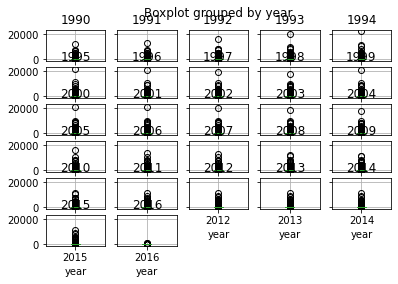

In [685]:
dataagrupada_df.boxplot(column='suicides_no', by='year')
plt.ylabel('Número de suicidios')
plt.xlabel('Año')
plt.title('Boxplot del número de suicidios por año')
plt.show()

Vemos que el numero de datos atípicos es muy grande, un motivo más para considerar agrupar por país en vez de por año:

In [686]:
dataagrupada2_df = data.groupby("country")
dataagrupada2_df.mean().drop(["population","year"],axis = 1)

,suicides_no,suicides/100k pop,HDI for year,gdp_per_capita ($),% de internet en la poblacion,% de desempleo en la poblacion,expectativa de vida
country,,,,,,,
Albania,7.745614,3.627412,0.676526,2026.368421,7.642668,17.873947,75.710526
Antigua and Barbuda,0.041667,0.678561,0.790571,11537.090909,23.233176,NaN,75.331818
Argentina,227.756410,10.182917,0.783962,8724.884615,20.442390,11.297240,74.457692
Armenia,6.392617,3.275872,0.683819,1873.919463,14.003076,11.750070,71.337584
Aruba,0.601190,9.503095,NaN,24221.642857,30.353500,NaN,74.057143
...,...,...,...,...,...,...,...
United Arab Emirates,8.638889,1.317917,0.829167,42162.000000,58.000000,2.804333,77.416667
United Kingdom,361.971154,7.195224,0.867808,35391.846154,46.339756,6.815200,78.480769
United States,2827.839744,13.470481,0.895038,42603.423077,45.899809,6.119600,77.276923


In [687]:
dataagrupada2_df.median().drop(["population","year"],axis = 1)

,suicides_no,suicides/100k pop,HDI for year,gdp_per_capita ($),% de internet en la poblacion,% de desempleo en la poblacion,expectativa de vida
country,,,,,,,
Albania,5.0,3.115,0.6840,1451.0,0.325798,16.875999,75.60
Antigua and Barbuda,0.0,0.000,0.7910,10949.5,14.864325,NaN,75.50
Argentina,161.5,5.100,0.7845,8395.0,11.397910,10.100000,74.30
Armenia,4.0,1.780,0.6760,788.0,1.960405,10.800000,71.00
Aruba,0.0,0.000,NaN,24501.5,24.200000,NaN,73.80
...,...,...,...,...,...,...,...
United Arab Emirates,3.0,1.160,0.8295,43653.0,62.000000,2.804500,77.30
United Kingdom,228.0,4.530,0.8755,33959.5,60.650000,6.200000,78.25
United States,2355.0,6.810,0.8940,41656.5,60.241261,5.780000,77.10


Vemos que ahora tenemos datos más específicos para cada país, lo cual puede tener más sentido, ya que en países con mayor población, como Estados Unidos, hay más suicidios, en contraste con Uruguay, donde en promedio hay 42.

También observamos que no hay datos sobre el porcentaje de desempleo en la población de países como Aruba o Antigua y Barbados, probablemente debido a la falta de bases de datos en estos países o a la característica de pobreza en ellos.

Veamos ahora los cuantiles:

In [688]:
dataagrupada2_df.quantile([0.25,0.75]).drop(["population"],axis = 1).head(20)

<ipython-input-688-4ddb30ee926c>:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



year  suicides_no  suicides/100k pop  \
country                                                             
Albania             0.25  1996.00         1.00             0.3050   
                    0.75  2006.00        12.00             5.3125   
Antigua and Barbuda 0.25  1995.00         0.00             0.0000   
                    0.75  2008.00         0.00             0.0000   
Argentina           0.25  1996.00        59.00             3.0800   
                    0.75  2009.00       406.75            14.7550   
Armenia             0.25  1996.00         1.00             0.5200   
                    0.75  2010.00        10.00             4.9525   
Aruba               0.25  2001.00         0.00             0.0000   
                    0.75  2008.00         1.00            12.3575   
Australia           0.25  1996.00        51.50             5.1850   
                    0.75  2009.00       301.50            22.9325   
Austria             0.25  1996.00        25.00             4.8850   
                    0.75  2010.00       173.75            28.5775   
Azerbaijan          0.25  1993.75         2.00             0.4250   
                    0.75  2001.25        11.00             2.6450   
Bahamas             0.25  1998.00         0.00             0.0000   
                    0.75  2008.00         0.00             0.0000   
Bahrain             0.25  2001.00         0.00             0.0000   
                    0.75  2010.00         2.00             2.5625   

                          HDI for year  gdp_per_capita ($)  \
country                                                      
Albania             0.25         0.642              835.00   
                    0.75         0.718             3235.00   
Antigua and Barbuda 0.25         0.781             9062.00   
                    0.75         0.801            14093.00   
Argentina           0.25         0.751             6475.00   
                    0.75         0.818             9843.00   
Armenia             0.25         0.641              515.00   
                    0.75         0.731             3773.00   
Aruba               0.25           NaN            22317.00   
                    0.75           NaN            26361.00   
Australia           0.25         0.884            21474.00   
                    0.75         0.921            52315.00   
Austria             0.25         0.845            27274.00   
                    0.75         0.886            49218.00   
Azerbaijan          0.25         0.604              610.25   
                    0.75         0.651              991.50   
Bahamas             0.25         0.781            26269.00   
                    0.75         0.807            31204.00   
Bahrain             0.25         0.804            14572.00   
                    0.75         0.817            25106.00   

                          % de internet en la poblacion  \
country                                                   
Albania             0.25                       0.032197   
                    0.75                       9.609991   
Antigua and Barbuda 0.25                       2.200769   
                    0.75                      38.000000   
Argentina           0.25                       0.141955   
                    0.75                      34.000000   
Armenia             0.25                       0.094573   
                    0.75                      25.000000   
Aruba               0.25                      17.100000   
                    0.75                      52.000000   
Australia           0.25                       2.759655   
                    0.75                      76.000000   
Austria             0.25                       6.909163   
                    0.75                      75.169998   
Azerbaijan          0.25                       0.000000   
                    0.75                       0.147758   
Bahamas             0.25                       2.335591   
                    0.75

Vemos que el rango intercuartílico en países como Argentina es muy grande, probablemente debido a la acumulación de años que se está haciendo, lo que sugiere que deberíamos agrupar no solo por país sino también por año. Lo mismo sucede con el GDP per cápita de países como Australia, por ejemplo.

Veamos ahora las medidas de forma:

In [690]:
curtosisns = dataagrupada2_df["suicides_no"].apply(pd.Series.kurtosis)
curtosisns

country
Albania                  1.875913
Antigua and Barbuda     35.111753
Argentina               -0.566765
Armenia                  1.454146
Aruba                    2.389854
                          ...    
United Arab Emirates     1.696398
United Kingdom           2.197554
United States            1.522098
Uruguay                 -0.028661
Uzbekistan               0.302127
Name: suicides_no, Length: 100, dtype: float64

In [691]:
curtosisns.sort_values().tail(17)

country
San Marino                       4.948195
Saint Vincent and Grenadines     5.266585
Saint Lucia                      5.695860
Bosnia and Herzegovina           5.777894
Cabo Verde                       6.276914
Suriname                         6.373964
Malta                            7.050439
Barbados                         7.242350
Bahrain                          7.254890
Kiribati                         8.525166
Estonia                          8.880168
Bahamas                          9.710482
Azerbaijan                      10.653053
Jamaica                         11.395022
Maldives                        14.007013
Grenada                         20.277769
Antigua and Barbuda             35.111753
Name: suicides_no, dtype: float64

In [692]:
curtosisHDI = dataagrupada2_df["HDI for year"].apply(pd.Series.kurtosis)
curtosisHDI

country
Albania                -1.282571
Antigua and Barbuda    -1.642347
Argentina              -1.143635
Armenia                -1.466752
Aruba                        NaN
                          ...   
United Arab Emirates   -0.867025
United Kingdom         -0.443694
United States          -0.443231
Uruguay                -0.620688
Uzbekistan             -1.181961
Name: HDI for year, Length: 100, dtype: float64

In [693]:
curtosisdes = dataagrupada2_df["% de desempleo en la poblacion"].apply(pd.Series.kurtosis)
curtosisdes

country
Albania                 1.837010
Antigua and Barbuda          NaN
Argentina              -1.073930
Armenia                -0.800930
Aruba                        NaN
                          ...   
United Arab Emirates   -0.859496
United Kingdom         -1.031342
United States          -0.264605
Uruguay                -0.464099
Uzbekistan             -1.096989
Name: % de desempleo en la poblacion, Length: 100, dtype: float64

In [694]:
curtosisesli = dataagrupada2_df["expectativa de vida"].apply(pd.Series.kurtosis)
curtosisesli

country
Albania                -1.245280
Antigua and Barbuda    -1.184590
Argentina              -1.178306
Armenia                -1.300860
Aruba                   0.373956
                          ...   
United Arab Emirates   -1.423366
United Kingdom         -1.347042
United States          -1.367354
Uruguay                -1.270673
Uzbekistan             -1.216140
Name: expectativa de vida, Length: 100, dtype: float64

Vemos que la mayoría de los países presentan una asimetría cercana a cero, lo que indica una distribución aproximadamente simétrica de los datos. Sin embargo, en algunos países como Argentina, el % de asimetría es mayor, lo que sugiere una distribución sesgada hacia un lado. Por otro lado, en el caso del número de suicidios, la asimetría es positiva en la mayoría de los países, lo que indica que hay una mayor concentración de valores en la cola derecha de la distribución, es decir, hay un mayor número de países con valores de suicidios más altos.

In [695]:
dataagrupada2_df.skew().drop(["population","year"],axis = 1)

<ipython-input-695-a4daa5035ae1>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,suicides_no,suicides/100k pop,HDI for year,gdp_per_capita ($),% de internet en la poblacion,% de desempleo en la poblacion,expectativa de vida
country,,,,,,,
Albania,1.470170,1.142273,-0.040680,0.632303,1.859855,1.422303,0.148344
Antigua and Barbuda,5.670747,6.080297,0.126868,0.182554,0.752048,NaN,0.235984
Argentina,0.878321,1.800864,-0.159814,0.366708,0.870153,0.453114,0.010633
Armenia,1.381548,2.040827,0.054126,0.344900,1.315481,-0.226568,0.123915
Aruba,1.810301,5.335456,NaN,-0.238821,0.539861,NaN,1.244309
...,...,...,...,...,...,...,...
United Arab Emirates,1.698807,2.438183,-0.520587,-0.325412,-0.959633,-0.040393,0.308160
United Kingdom,1.629188,0.537089,-0.650505,0.012604,-0.132904,0.421589,0.059038
United States,1.389905,1.047880,-0.363986,-0.019786,-0.504076,0.817257,0.015905


Vemos que la desviación estándar también es mayor en el número de suicidios por año, lo que indica una mayor variabilidad en los datos en comparación con las demás variables. Además, hay algunos países que presentan una desviación estándar bastante alta en ciertos años, lo que puede indicar una mayor variabilidad en los datos para esos años en particular. Sería interesante explorar qué factores podrían estar contribuyendo a esta variabilidad.





In [696]:
dataagrupada2_df.std().drop("population",axis = 1)

,year,suicides_no,suicides/100k pop,HDI for year,gdp_per_capita ($),% de internet en la poblacion,% de desempleo en la poblacion,expectativa de vida
country,,,,,,,,
Albania,5.489277,8.693318,3.564866,0.041380,1422.418337,13.687507,4.138184,1.379099
Antigua and Barbuda,7.584573,0.218373,3.741473,0.008500,2618.455765,23.601439,NaN,1.517168
Argentina,7.512048,201.943495,11.102675,0.039349,3240.499489,22.674204,4.180455,1.479682
Armenia,8.049740,6.740266,3.806220,0.050708,1541.130961,20.339570,5.119575,1.935613
Aruba,4.444121,1.067427,25.016613,NaN,2968.073993,20.806304,NaN,0.649696
...,...,...,...,...,...,...,...,...
United Arab Emirates,1.719810,13.192300,1.529608,0.004087,4811.254798,9.464537,0.204159,0.582612
United Kingdom,7.512048,386.869224,5.910717,0.037761,10774.041790,36.177342,1.730445,1.751659
United States,7.512048,2851.424213,12.706023,0.014774,10570.940792,28.513591,1.551100,1.219554


Las desviaciones estándar son altas, posiblemente debido a la agrupación de años que se está haciendo. Una vez más, debemos considerar agrupar por año y por país.

In [697]:
dataagrupada2_df.corr()

year  suicides_no  population  \
country                                                                        
Albania    year                            1.000000    -0.023725   -0.036992   
           suicides_no                    -0.023725     1.000000    0.319410   
           population                     -0.036992     0.319410    1.000000   
           suicides/100k pop              -0.032748     0.718972   -0.219341   
           HDI for year                    0.979095     0.001133   -0.034532   
...                                             ...          ...         ...   
Uzbekistan HDI for year                    0.968756     0.030755    0.137782   
           gdp_per_capita ($)              0.753732     0.080867    0.181274   
           % de internet en la poblacion   0.852169     0.081255    0.207399   
           % de desempleo en la poblacion -0.195320     0.042196   -0.035961   
           expectativa de vida             0.952719     0.050923    0.233856   

                                           suicides/100k pop  HDI for year  \
country                                                                      
Albania    year                                    -0.032748      0.979095   
           suicides_no                              0.718972      0.001133   
           population                              -0.219341     -0.034532   
           suicides/100k pop                        1.000000     -0.003411   
           HDI for year                            -0.003411      1.000000   
...                                                      ...           ...   
Uzbekistan HDI for year                            -0.202154      1.000000   
           gdp_per_capita ($)                      -0.150211      0.893853   
           % de internet en la poblacion           -0.181544      0.892868   
           % de desempleo en la poblacion           0.107498     -0.953532   
           expectativa de vida                     -0.250681      0.977851   

                                           gdp_per_capita ($)  \
country                                                         
Albania    year                                      0.952281   
           suicides_no                              -0.063156   
           population                               -0.041890   
           suicides/100k pop                        -0.075994   
           HDI for year                              0.935302   
...                                                       ...   
Uzbekistan HDI for year                              0.893853   
           gdp_per_capita ($)                        1.000000   
           % de internet en la poblacion             0.965483   
           % de desempleo en la poblacion           -0.496298   
           expectativa de vida                       0.826269   

                                           % de internet en la poblacion  \
country                                                                    
Albania    year                                                 0.754779   
           suicides_no                                         -0.107022   
           population                                          -0.038411   
           suicides/100k pop                                   -0.134121   
           HDI for year                                         0.701075   
...                                                                  ...   
Uzbekistan HDI for year                                         0.892868   
           gdp_per_capita ($)                                   0.965483   
           % de internet en la poblacion                        1.000000   
           % de desempleo en la poblacion                      -0.464069   
           expectativa de vida                                  0.904461   

                                           % de desempleo en la poblacion  \
country                                                                     
Al

Nuevamente la correlación no es tan fuerte como esperábamos, posiblemente debido a la agrupación por año.

Veamos la agrupación por año y país:

In [698]:
dataagrupada3_df = data.groupby(["year","country"])

In [699]:
dataagrupada3_df.mean().drop("population",axis=1).head(50)

suicides_no  suicides/100k pop  HDI for year  \
year country                                                               
1990 Antigua and Barbuda       0.083333           1.436667           NaN   
     Argentina               178.333333          11.241667         0.705   
     Armenia                   7.750000           3.426667         0.632   
     Australia               183.500000          14.362500         0.865   
     Austria                 152.083333          29.481667         0.794   
     Azerbaijan                9.500000           2.050833           NaN   
     Barbados                  1.333333          10.102500         0.716   
     Belarus                 173.750000          22.864167           NaN   
     Belgium                 157.916667          23.092500         0.806   
     Belize                    0.250000           2.475000         0.644   
     Brazil                  400.250000           5.588333         0.608   
     Bulgaria                110.250000          21.369167         0.695   
     Canada                  281.500000          13.751667         0.849   
     Chile                    61.916667           7.655000         0.699   
     Colombia                 72.083333           3.619167         0.596   
     Costa Rica               13.083333           7.772500         0.652   
     Czech Republic          166.416667          26.185000         0.761   
     Ecuador                  37.333333           5.040000         0.645   
     El Salvador              47.583333          15.371667         0.522   
     Finland                 126.000000          33.018333         0.783   
     France                  950.250000          25.227500         0.779   
     Georgia                  16.333333           5.369167           NaN   
     Germany                1160.333333          21.620833         0.801   
     Greece                   29.083333           4.290833         0.759   
     Grenada                   0.166667           2.062500           NaN   
     Guatemala                13.166667           2.839167         0.483   
     Guyana                    7.416667          14.755000         0.542   
     Iceland                   3.333333          15.025833         0.802   
     Ireland                  27.833333          10.473333         0.770   
     Israel                   25.333333          10.188333         0.785   
     Italy                   366.833333          10.165000         0.766   
     Jamaica                   0.250000           0.110000         0.671   
     Japan                  1666.833333          20.530833         0.814   
     Kazakhstan              264.333333          27.843333         0.690   
     Kyrgyzstan               45.583333          20.589167         0.615   
     Luxembourg                5.666667          19.445000         0.779   
     Malta                     0.666667           1.979167         0.729   
     Mauritius                12.250000          13.598333         0.619   
     Mexico                  160.500000           4.070833         0.648   
     Netherlands             120.833333          11.347500         0.829   
     New Zealand              37.916667          15.547500         0.820   
     Norway                   54.916667          15.942500         0.849   
     Paraguay                  8.250000           3.750833         0.579   
     Poland                  414.166667          14.386667         0.713   
     Portugal                 72.500000          12.517500         0.710   
     Puerto Rico              30.916667          15.131667           NaN   
     Republic of Korea       263.250000          10.044167           NaN   
     Romania                 173.250000          10.493333         0.703   
     Russian Federation     3252.333333          33.264167           NaN   
     Saint Kitts and Nevis     0.000000           0.000000           NaN   

                            gdp_per_capita ($)  % de internet en la poblaci

In [700]:
dataagrupada3_df.median().drop(["population"],axis = 1).head(50)

suicides_no  suicides/100k pop  HDI for year  \
year country                                                               
1990 Antigua and Barbuda            0.0              0.000           NaN   
     Argentina                    168.5              7.135         0.705   
     Armenia                        5.0              3.175         0.632   
     Australia                    103.5              7.865         0.865   
     Austria                      150.0             23.515         0.794   
     Azerbaijan                     6.0              1.780           NaN   
     Barbados                       1.0              4.500         0.716   
     Belarus                       96.5             16.155           NaN   
     Belgium                      147.5             16.820         0.806   
     Belize                         0.0              0.000         0.644   
     Brazil                       277.0              3.225         0.608   
     Bulgaria                      94.0             15.125         0.695   
     Canada                       151.5              7.405         0.849   
     Chile                         25.0              2.500         0.699   
     Colombia                      40.5              2.060         0.596   
     Costa Rica                     5.0              3.200         0.652   
     Czech Republic               139.5             15.955         0.761   
     Ecuador                       23.5              4.810         0.645   
     El Salvador                   29.0             14.050         0.522   
     Finland                       84.5             17.930         0.783   
     France                       821.0             16.170         0.779   
     Georgia                       16.0              4.425           NaN   
     Germany                     1151.0             15.485         0.801   
     Greece                        25.0              2.430         0.759   
     Grenada                        0.0              0.000           NaN   
     Guatemala                      7.0              1.130         0.483   
     Guyana                         4.0             12.975         0.542   
     Iceland                        1.0              4.785         0.802   
     Ireland                       20.0              7.910         0.770   
     Israel                        22.5              7.140         0.785   
     Italy                        296.0              6.560         0.766   
     Jamaica                        0.0              0.000         0.671   
     Japan                       1433.5             15.180         0.814   
     Kazakhstan                   179.0             22.015         0.690   
     Kyrgyzstan                    33.5             14.590         0.615   
     Luxembourg                     4.5             21.370         0.779   
     Malta                          0.0              0.000         0.729   
     Mauritius                     10.5             12.995         0.619   
     Mexico                        72.5              1.165         0.648   
     Netherlands                   96.5             10.075         0.829   
     New Zealand                   21.0              7.290         0.820   
     Norway                        44.5             12.635         0.849   
     Paraguay                       6.5              2.920         0.579   
     Poland                       209.0              7.755         0.713   
     Portugal                      58.5              7.035         0.710   
     Puerto Rico                   11.5              3.730           NaN   
     Republic of Korea            237.0              8.610           NaN   
     Romania                      132.0              8.980         0.703   
     Russian Federation          2037.5             24.145           NaN   
     Saint Kitts and Nevis          0.0              0.000           NaN   

                            gdp_per_capita ($)  % de internet en la poblaci

Vemos que de esta forma, los datos son mucho más precisos al agrupar por año y país, lo cual nos da una mayor cantidad de información. Por ejemplo, podemos observar que en Corea no se tienen datos para el acceso a internet en el año 1990, lo que nos permite tomar decisiones respecto a cómo manejar los valores faltantes en esta columna, como reemplazarlos por un cero o por el promedio según sea el caso. Veamos ahora los cuantiles:

In [701]:
dataagrupada3_df.quantile([0.25,0.75]).drop(["population"],axis = 1).head(20)

<ipython-input-701-2f509588a61e>:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



suicides_no  suicides/100k pop  HDI for year  \
year country                                                                  
1990 Antigua and Barbuda 0.25         0.00             0.0000           NaN   
                         0.75         0.00             0.0000           NaN   
     Argentina           0.25        72.25             3.5000         0.705   
                         0.75       199.00            10.1500         0.705   
     Armenia             0.25         1.75             1.2275         0.632   
                         0.75        12.00             5.4025         0.632   
     Australia           0.25        57.25             5.9125         0.865   
                         0.75       337.25            25.8950         0.865   
     Austria             0.25        47.50             7.7000         0.794   
                         0.75       191.75            37.7050         0.794   
     Azerbaijan          0.25         1.75             0.8575           NaN   
                         0.75        12.25             2.5300           NaN   
     Barbados            0.25         0.00             0.0000         0.716   
                         0.75         2.00            10.0925         0.716   
     Belarus             0.25        39.75             4.8700           NaN   
                         0.75       208.25            43.8200           NaN   
     Belgium             0.25        70.00             9.1325         0.806   
                         0.75       209.25            27.9050         0.806   
     Belize              0.25         0.00             0.0000         0.644   
                         0.75         0.25             1.2450         0.644   

                               gdp_per_capita ($)  \
year country                                        
1990 Antigua and Barbuda 0.25              7744.0   
                         0.75              7744.0   
     Argentina           0.25              4859.0   
                         0.75              4859.0   
     Armenia             0.25               756.0   
                         0.75               756.0   
     Australia           0.25             19665.0   
                         0.75             19665.0   
     Austria             0.25             23020.0   
                         0.75             23020.0   
     Azerbaijan          0.25              1439.0   
                         0.75              1439.0   
     Barbados            0.25              8537.0   
                         0.75              8537.0   
     Belarus             0.25              2301.0   
                         0.75              2301.0   
     Belgium             0.25             22032.0   
                         0.75             22032.0   
     Belize              0.25              2614.0   
                         0.75              2614.0   

                               % de internet en la poblacion  \
year country                                                   
1990 Antigua and Barbuda 0.25                       0.000000   
                         0.75                       0.000000   
     Argentina           0.25                       0.000000   
                         0.75                       0.000000   
     Armenia             0.25                       0.000000   
                         0.75                       0.000000   
     Australia           0.25                       0.585095   
                         0.75                       0.585095   
     Austria             0.25                       0.130369   
                         0.75                       0.130369   
     Azerbaijan          0.25                       0.000000   
                         0.75                       0.000000   
     Barbados            0.25                       0.000000   
                         0.75                       0.000000   
     Belarus             0.25                       0.000000   
                         0.75        

Al igual que las medidas de posición, vemos que varios de los datos son más precisos, aunque podremos confirmar esto más fuertemente con las medidas de dispersión.

In [703]:
curtosisns = dataagrupada3_df["suicides_no"].apply(pd.Series.kurtosis)
curtosisns

year  country            
1990  Antigua and Barbuda    12.000000
      Argentina               0.890025
      Armenia                 0.488470
      Australia              -0.482509
      Austria                 0.468813
                               ...    
2016  Netherlands             0.271033
      Qatar                   0.497137
      Romania                 1.065298
      Sweden                  0.514682
      Thailand                3.041734
Name: suicides_no, Length: 2070, dtype: float64

In [704]:
curtosisns.sort_values().tail(17)

year  country            
2001  Aruba                  12.0
      Bahamas                12.0
1995  Grenada                12.0
2002  Jamaica                12.0
2007  Antigua and Barbuda    12.0
2003  Antigua and Barbuda    12.0
      Bahamas                12.0
2004  Grenada                12.0
      Jamaica                12.0
1997  Belize                 12.0
2005  Barbados               12.0
      Maldives               12.0
      San Marino             12.0
1993  Belize                 12.0
      Antigua and Barbuda    12.0
2003  Aruba                  12.0
1990  Antigua and Barbuda    12.0
Name: suicides_no, dtype: float64

In [705]:
curtosisHDI = dataagrupada3_df["HDI for year"].apply(pd.Series.kurtosis)
curtosisHDI

year  country            
1990  Antigua and Barbuda    NaN
      Argentina              0.0
      Armenia                0.0
      Australia              0.0
      Austria                0.0
                            ... 
2016  Netherlands            0.0
      Qatar                  0.0
      Romania                0.0
      Sweden                 0.0
      Thailand               0.0
Name: HDI for year, Length: 2070, dtype: float64

In [706]:
curtosisdes = dataagrupada3_df["% de desempleo en la poblacion"].apply(pd.Series.kurtosis)
curtosisdes

year  country            
1990  Antigua and Barbuda    NaN
      Argentina              NaN
      Armenia                NaN
      Australia              NaN
      Austria                NaN
                            ... 
2016  Netherlands            0.0
      Qatar                  0.0
      Romania                0.0
      Sweden                 0.0
      Thailand               0.0
Name: % de desempleo en la poblacion, Length: 2070, dtype: float64

In [707]:
curtosisesli = dataagrupada3_df["expectativa de vida"].apply(pd.Series.kurtosis)
curtosisesli

year  country            
1990  Antigua and Barbuda    0.0
      Argentina              0.0
      Armenia                0.0
      Australia              0.0
      Austria                0.0
                            ... 
2016  Netherlands            0.0
      Qatar                  0.0
      Romania                0.0
      Sweden                 0.0
      Thailand               0.0
Name: expectativa de vida, Length: 2070, dtype: float64

Vemos que, al igual que antes, la curtosis en países como Aruba, Bahamas, Antigua y Barbuda y Jamaica es muy alta, mostrando una gran concentración de datos en la media. Complementemos esto una vez más con la asimetría:

In [708]:
dataagrupada3_df.skew().drop(["population"],axis = 1)

<ipython-input-708-c0587bccfd39>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



suicides_no  suicides/100k pop  HDI for year  \
year country                                                             
1990 Antigua and Barbuda     3.464102           3.464102           NaN   
     Argentina               1.213348           2.585041           0.0   
     Armenia                 1.033779           0.281246           0.0   
     Australia               0.929810           0.300211           0.0   
     Austria                 0.777991           1.848366           0.0   
...                               ...                ...           ...   
2016 Netherlands             1.188321           0.372711           0.0   
     Qatar                   1.377197           0.550280           0.0   
     Romania                 1.600823           0.973128           0.0   
     Sweden                  1.186991           0.834242           0.0   
     Thailand                1.710983           0.272231           0.0   

                          gdp_per_capita ($)  % de internet en la poblacion  \
year country                                                                  
1990 Antigua and Barbuda                 0.0                            0.0   
     Argentina                           0.0                            0.0   
     Armenia                             0.0                            0.0   
     Australia                           0.0                            0.0   
     Austria                             0.0                            0.0   
...                                      ...                            ...   
2016 Netherlands                         0.0                            0.0   
     Qatar                               0.0                            0.0   
     Romania                             0.0                            0.0   
     Sweden                              0.0                            0.0   
     Thailand                            0.0                            0.0   

                          % de desempleo en la poblacion  expectativa de vida  
year country                                                                   
1990 Antigua and Barbuda                             NaN                  0.0  
     Argentina                                       NaN                  0.0  
     Armenia                                         NaN                  0.0  
     Australia                                       NaN                  0.0  
     Austria                                         NaN                  0.0  
...                                                  ...                  ...  
2016 Netherlands                                     0.0                  0.0  
     Qatar                                           0.0                  0.0  
     Romania                                         0.0                  0.0  
     Sweden                                          0.0                  0.0  
     Thailand                                        0.0                  0.0  

[2070 rows x 7 columns]

Se confirma que en estos países puede presentarse una gran concentración de datos atípicos, que podrían ser eliminados o tal vez la población relativamente pequeña que poseen pueda ser una explicación para esto.

No podemos obtener una buena matriz de correlaciones sin antes haber limpiado los datos y eliminado los valores faltantes. Sin embargo, en el caso de Colombia, podemos ver su matriz de correlaciones.

In [709]:
dataCol = data[data['country'] == "Colombia"]
dataCol.groupby(["year","country"])
dataCol.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),% de internet en la poblacion,% de desempleo en la poblacion,expectativa de vida
year,1.000000,0.204293,0.242361,0.102372,0.969889,0.905262,0.910572,-0.178305,0.997479
suicides_no,0.204293,1.000000,0.405999,0.598663,0.201929,0.129128,0.128945,0.104100,0.195284
population,0.242361,0.405999,1.000000,-0.242446,0.234061,0.214855,0.214257,-0.024059,0.241216
suicides/100k pop,0.102372,0.598663,-0.242446,1.000000,0.105116,0.029447,0.025109,0.144348,0.091886
HDI for year,0.969889,0.201929,0.234061,0.105116,1.000000,0.851684,0.863627,-0.193747,0.965737
gdp_per_capita ($),0.905262,0.129128,0.214855,0.029447,0.851684,1.000000,0.958952,-0.375680,0.920870
% de internet en la poblacion,0.910572,0.128945,0.214257,0.025109,0.863627,0.958952,1.000000,-0.413411,0.926294
% de desempleo en la poblacion,-0.178305,0.104100,-0.024059,0.144348,-0.193747,-0.375680,-0.413411,1.000000,-0.220931
expectativa de vida,0.997479,0.195284,0.241216,0.091886,0.965737,0.920870,0.926294,-0.220931,1.000000


Vemos que ahora se presenta no solo una correlación con la población sino que tambien una correlación con los sucicidios por cada 100000 habitantes.

Veamos ahora algunas graficas que pueden ayudarnos a entender más los datos:

Veamos por ejemplo si hay alguna relación entre la tasa de suicidio anual y el porcentaje de desempleo anual

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<Axes: title={'center': 'Promedio de la tasa de suicidios anual vs. Promedio del desempleo anual'}, xlabel='Desempleo promedio', ylabel='Tasa de suicidios promedio'>

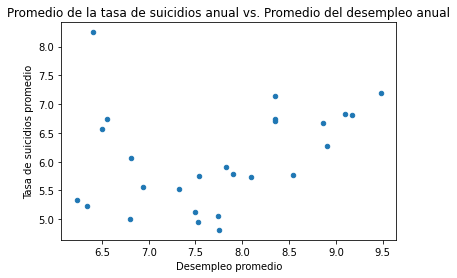

In [710]:
promsanuales = dataagrupada_df.median()
dataplot_df = pd.DataFrame({
    'Tasa de suicidios promedio': promsanuales["suicides/100k pop"],
    'Desempleo promedio': promsanuales['% de desempleo en la poblacion']
})
dataplot_df.plot(x='Desempleo promedio', y='Tasa de suicidios promedio', kind='scatter', title='Promedio de la tasa de suicidios anual vs. Promedio del desempleo anual')

Vemos que hay una relación evidente, a mayor tasa de desempleo, mayor tasa de suicidios. Estos valores atípicos serán eliminados posteriormente.

Respecto a la pregunta sobre la relación entre la esperanza de vida y la tasa promedio de suicidios, podríamos explorar si hay alguna correlación entre estas variables.

<Axes: title={'center': 'Promedio de la tasa de suicidios anual vs. HDI anual'}, xlabel='expectativa de vida', ylabel='Tasa de suicidios promedio'>

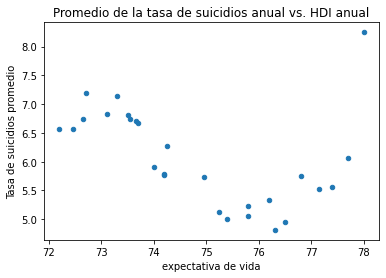

In [711]:
promsanuales = dataagrupada_df.median()
dataplot_df = pd.DataFrame({
    'Tasa de suicidios promedio': promsanuales["suicides/100k pop"],
    'expectativa de vida': promsanuales['expectativa de vida']
})
dataplot_df.plot(x='expectativa de vida', y='Tasa de suicidios promedio', kind='scatter', title='Promedio de la tasa de suicidios anual vs. HDI anual')

Nuevamente una relación evidente, solo debemos retirar algunos outliers

Y ahora el caso del HDI?

<Axes: title={'center': 'Promedio de la tasa de suicidios anual vs. HDI anual'}, xlabel='HDI for year', ylabel='Tasa de suicidios promedio'>

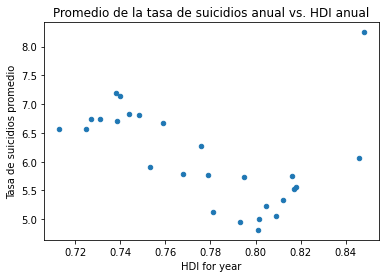

In [712]:
promsanuales = dataagrupada_df.median()
dataplot_df = pd.DataFrame({
    'Tasa de suicidios promedio': promsanuales["suicides/100k pop"],
    'HDI for year': promsanuales['HDI for year']
})
dataplot_df.plot(x='HDI for year', y='Tasa de suicidios promedio', kind='scatter', title='Promedio de la tasa de suicidios anual vs. HDI anual')

Vemos que hay una correlación negativa entre el HDI anual y la tasa de suicidios; sin embargo, esta no se veía claramente debido a los valores atípicos que limpiaremos posteriormente.

Ahora, pensemos si hay alguna relación entre los rangos de edad de las personas y el porcentaje de suicidios. Para esto, agruparemos por rango de edad y por año, para luego hacer un histograma.

In [713]:
dataedadañoprom = data.groupby(["year","age"]).median()


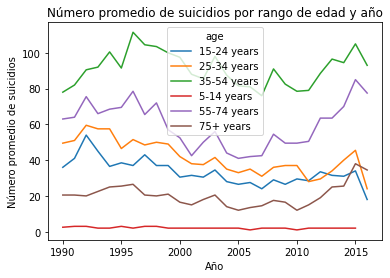

In [714]:
tabla = dataedadañoprom.pivot_table(values='suicides_no', index='year', columns='age')
tabla.plot(kind='line')
plt.ylabel('Número promedio de suicidios')
plt.xlabel('Año')
plt.title('Número promedio de suicidios por rango de edad y año')
plt.show()

Vemos varias relaciones interesantes y tendencias en años recientes que pueden ser exploradas a futuro.


Ahora sería interesante ver que sucede con el sexo de la persona:

In [715]:
datasexoañoprom = data.groupby(["year","sex"]).median()
datasexoañoprom.head()

suicides_no  population  suicides/100k pop  HDI for year  \
year sex                                                                
1990 female         17.0    487100.0              3.890         0.713   
     male           48.5    425667.5             14.190         0.713   
1991 female         17.0    535528.5              3.605         0.725   
     male           49.0    489350.0             14.390         0.725   
1992 female         17.0    573950.0              4.180         0.727   

             gdp_per_capita ($)  % de internet en la poblacion  \
year sex                                                         
1990 female              4091.5                       0.000000   
     male                4091.5                       0.000000   
1991 female              4347.0                       0.000000   
     male                4347.0                       0.000000   
1992 female              4564.0                       0.000729   

             % de desempleo en la poblacion  expectativa de vida  
year sex                                                          
1990 female                             NaN                72.45  
     male                               NaN                72.45  
1991 female                            6.50                72.20  
     male                              6.50                72.20  
1992 female                            6.56                72.65

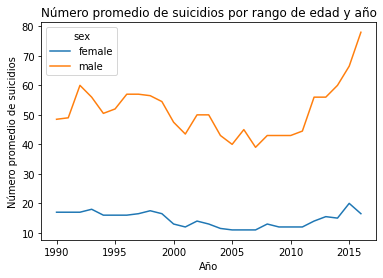

In [716]:
tabla = datasexoañoprom.pivot_table(values='suicides_no', index='year', columns='sex')
tabla.plot(kind='line')
plt.ylabel('Número promedio de suicidios')
plt.xlabel('Año')
plt.title('Número promedio de suicidios por rango de edad y año')
plt.show()

Vemos una gran diferencia entre la tasa de suicidio de hombres y la de mujeres qu podremos explorar despues.

## 3 Preparación de los datos


Primero eliminemos los datos correspondientes al año 2016, ya que como hemos visto, estos presentan variaciones significativas en las tendencias de las medidas características de los datos.

In [717]:
data = data.drop(data[data["year"] == 2016].index)

In [718]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24648 entries, 36 to 27819
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         24648 non-null  object 
 1   year                            24648 non-null  int64  
 2   sex                             24648 non-null  object 
 3   age                             24648 non-null  object 
 4   suicides_no                     24648 non-null  int64  
 5   population                      24648 non-null  int64  
 6   suicides/100k pop               24648 non-null  float64
 7   country-year                    24648 non-null  object 
 8   HDI for year                    21948 non-null  float64
 9    gdp_for_year ($)               24648 non-null  object 
 10  gdp_per_capita ($)              24648 non-null  int64  
 11  generation                      24648 non-null  object 
 12  % de internet en la poblacion  

Una vez eliminado el año 2016, procedamos a reparar los valores NaN del porcentaje de desempleo en la población. El conjunto de datos con el que trabajamos tiene información de todos los países y los años desde 1991 hasta, al menos, 2015. Por lo tanto, la mejor opción sería llenar el porcentaje de desempleo de los años 1990 con su valor correspondiente en el año 1991. No utilizaremos el promedio porque puede ser muy diferente al valor real y además, podría perder el sentido del desarrollo temporal de la estadística

In [719]:
dataempl1991 = dataempleo[dataempleo['year']==1991] #Seleccionamos solo los datos del año 1991 del dataframe que contiene los datos del porcentaje de empleo

In [720]:
datadict = {} #creamos un diccionario en el que pondremos con llave el pais y como valor el porcentaje de desempleo en 1991

for index, row in dataempl1991.iterrows():
    datadict[row['country']] = row['Unemployment, total (% of total labor force) (modeled ILO estimate)']

In [721]:
for pais in data['country'].unique(): ##iteramos sobre cada pais de nuestro dataframe
  if pais in datadict.keys(): ##verifiquemos que este pais este en las llaves de nuestro diccionario
    data.loc[(data['year'] == 1990) & (data['country'] == pais), '% de desempleo en la poblacion'] = datadict[pais]
    #Si si lo esta asignamos a los valores de porcentaje de desempleo de cada pais nuestro valor del diccionario

In [722]:
data.info() #Vemos que el numero se reduce en aproximadamente 2000 datos, los datos faltantes son de los paises de lso cuales no se tiene datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24648 entries, 36 to 27819
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         24648 non-null  object 
 1   year                            24648 non-null  int64  
 2   sex                             24648 non-null  object 
 3   age                             24648 non-null  object 
 4   suicides_no                     24648 non-null  int64  
 5   population                      24648 non-null  int64  
 6   suicides/100k pop               24648 non-null  float64
 7   country-year                    24648 non-null  object 
 8   HDI for year                    21948 non-null  float64
 9    gdp_for_year ($)               24648 non-null  object 
 10  gdp_per_capita ($)              24648 non-null  int64  
 11  generation                      24648 non-null  object 
 12  % de internet en la poblacion  

###Valores nulos y selección de caracetristicas

Notemos que los datos faltantes corresponden a países en los cuales no se encontraron estos datos. Si los llenamos con el promedio general, se generaría una anomalía en la característica temporal de los datos. Vamos a continuar llenando los relativamente pocos valores faltantes con el promedio del año al que corresponden, siguiendo la característica. Antes de hacer esto, primero cambiaremos el nombre de nuestras variables para que puedan ser manejadas mejor:


In [723]:
data = data.rename(columns = {"country": "País", "year":"Año","sex":"Sexo","age":"Edad", "suicides_no":"Número_de_suicidios",
                              "population":"Población","suicides/100k pop":"Tasa_de_suicidios","HDI for year":"HDI_por_año",
                              " gdp_for_year ($) ":"GDP_por_año","gdp_per_capita ($)":"GDP_per_capita",
                              "% de internet en la poblacion":"porcentaje_de_internet_en_la_población",
                              "% de desempleo en la poblacion":"porcentaje_de_desempleo_en_la_población",
                              "expectativa de vida":"expectativa_de_vida"})

También eliminaremos ciertas columnas, como por ejemplo la columna "country-year" y la correspondiente a la generación, pues la información de estas está codificada en las columnas "País", "Año" y "Edad".

In [724]:
data = data.drop(["country-year","generation"], axis = 1)

In [725]:
data

,País,Año,Sexo,Edad,Número_de_suicidios,Población,Tasa_de_suicidios,HDI_por_año,GDP_por_año,GDP_per_capita,porcentaje_de_internet_en_la_población,porcentaje_de_desempleo_en_la_población,expectativa_de_vida
36,Albania,1992,male,35-54 years,12,343800,3.49,0.614,"709,452,584",251,0.0,30.014999,73.7
37,Albania,1992,male,15-24 years,9,263700,3.41,0.614,"709,452,584",251,0.0,30.014999,73.7
38,Albania,1992,male,55-74 years,5,159500,3.13,0.614,"709,452,584",251,0.0,30.014999,73.7
39,Albania,1992,male,25-34 years,7,245500,2.85,0.614,"709,452,584",251,0.0,30.014999,73.7
40,Albania,1992,female,15-24 years,7,292400,2.39,0.614,"709,452,584",251,0.0,30.014999,73.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,35.5,5.100000,70.2
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,35.5,5.100000,70.2
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,35.5,5.100000,70.2
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,35.5,5.100000,70.2


In [726]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24648 entries, 36 to 27819
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   País                                     24648 non-null  object 
 1   Año                                      24648 non-null  int64  
 2   Sexo                                     24648 non-null  object 
 3   Edad                                     24648 non-null  object 
 4   Número_de_suicidios                      24648 non-null  int64  
 5   Población                                24648 non-null  int64  
 6   Tasa_de_suicidios                        24648 non-null  float64
 7   HDI_por_año                              21948 non-null  float64
 8   GDP_por_año                              24648 non-null  object 
 9   GDP_per_capita                           24648 non-null  int64  
 10  porcentaje_de_internet_en_la_población   2311

Ahora sí, podemos comenzar a llenar los valores faltantes como ya se había indicado:

Para cada variable, identificaremos si tiene valores faltantes. Si los tiene, sabemos que cada valor faltante corresponde a un año y a la variable de esta columna. Así que llenaremos este valor faltante con el valor correspondiente al promedio de la variable en ese año.

Sabemos que las variables con datos faltantes son: HDI por año, Porcentaje de internet en la población, Porcentaje de desempleo en la población y Expectativa de vida.

In [727]:
data["HDI_por_año"] = data.groupby("Año")["HDI_por_año"].transform(lambda x: x.fillna(x.mean()))
data["porcentaje_de_internet_en_la_población"] = data.groupby("Año")["porcentaje_de_internet_en_la_población"].transform(lambda x: x.fillna(x.mean()))
data["porcentaje_de_desempleo_en_la_población"] = data.groupby("Año")["porcentaje_de_desempleo_en_la_población"].transform(lambda x: x.fillna(x.mean()))
data["expectativa_de_vida"] = data.groupby("Año")["expectativa_de_vida"].transform(lambda x: x.fillna(x.mean()))
#Agrupamos por año, y usamos transforma para llenar los valores faltantes de ese año con el promedio de los valores de ese año

In [728]:
data.info() #vemos que ya no tenemos valores nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24648 entries, 36 to 27819
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   País                                     24648 non-null  object 
 1   Año                                      24648 non-null  int64  
 2   Sexo                                     24648 non-null  object 
 3   Edad                                     24648 non-null  object 
 4   Número_de_suicidios                      24648 non-null  int64  
 5   Población                                24648 non-null  int64  
 6   Tasa_de_suicidios                        24648 non-null  float64
 7   HDI_por_año                              24648 non-null  float64
 8   GDP_por_año                              24648 non-null  object 
 9   GDP_per_capita                           24648 non-null  int64  
 10  porcentaje_de_internet_en_la_población   2464

Finalmente cambiemos los valores de las variables categorias: "male" y "female" a hombre y mujer, también haremos lo propio con los rangos de edad:

In [798]:
data['Sexo'] = data['Sexo'].replace({'male': 'masculino', 'female': 'femenino'})
data['Edad'] = data['Edad'].replace(({"15-24 years":"15-24 años","25-34 years":"25-35 años","35-54 years":"35-54 años","55-74 years":"55-74 años",
                                     "75+ years":"75+ años","5-14 years":"5-14 años"}))

### Ouliers

Ahora limpiemos los outliers para mejorar las correlaciones entre los datos:

Recordemos los datasets que manejamos para encontrar nuestras correlaciones.:

In [800]:
dataagrupada_df = data.groupby("Año") #Agrupamos los datos por año


Recordemos que la desviación estándar en estos datos es muy alta, por lo tanto, es recomendable utilizar la mediana en lugar de la media para realizar nuestras gráficas y limpiar los outliers.

In [801]:
mediasanuales = dataagrupada_df.median()
mediasanuales

,Número_de_suicidios,Población,Tasa_de_suicidios,HDI_por_año,GDP_per_capita,porcentaje_de_internet_en_la_población,porcentaje_de_desempleo_en_la_población,expectativa_de_vida
Año,,,,,,,,
1990,28.5,460363.0,6.560,0.715294,4091.5,0.000000,7.364404,71.792500
1991,28.0,512276.0,6.560,0.723160,4347.0,0.000000,7.360456,71.690164
1992,33.0,563938.0,6.735,0.726824,4564.0,0.002993,7.880000,71.887097
1993,33.0,529843.5,6.735,0.730906,5180.0,0.029527,8.610000,73.200000
1994,28.0,480452.0,6.705,0.740222,6359.5,0.124129,8.950000,73.200000
1995,28.0,396800.0,7.145,0.735591,5504.0,0.328555,8.750000,73.150000
1996,30.0,452850.0,7.190,0.742848,5031.0,0.969240,9.620000,72.563014
1997,32.0,459239.5,6.835,0.747433,5546.0,1.849635,9.210556,72.775342
1998,31.5,461028.0,6.810,0.753353,5871.0,3.218202,9.220137,73.001333


Comencemos con los outliers referentes al porcentaje de desempleo de la poblacion:

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<Axes: title={'center': 'Promedio de la tasa de suicidios anual vs. Promedio del desempleo anual'}, xlabel='Desempleo promedio', ylabel='Tasa de suicidios promedio'>

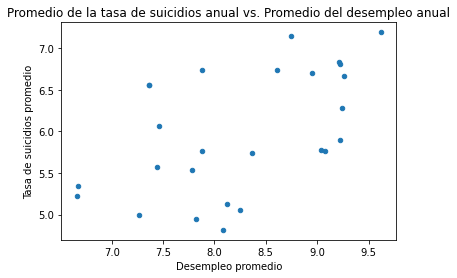

In [802]:
dataplot_df = pd.DataFrame({
    'Tasa de suicidios promedio': mediasanuales["Tasa_de_suicidios"],
    'Desempleo promedio': mediasanuales['porcentaje_de_desempleo_en_la_población']
})
dataplot_df.plot(x='Desempleo promedio', y='Tasa de suicidios promedio', kind='scatter', title='Promedio de la tasa de suicidios anual vs. Promedio del desempleo anual')

Observamos que en los datos existen valores atípicos, identificados como aquellos con una tasa de desempleo entre 7% y 8.5%, y una tasa de suicidios mayor a 5.9 por cada 100k habitantes. Asimismo, aquellos con una tasa de desempleo menor a 7% y una tasa de suicidios mayor a 7 también son considerados como outliers. Para limpiar estos valores atípicos, los eliminaremos y los remplazaremos por el valor promedio de la tasa de desempleo correspondiente.

In [803]:
mediasanuales.loc[(mediasanuales['porcentaje_de_desempleo_en_la_población'] >= 7) & (mediasanuales['porcentaje_de_desempleo_en_la_población'] <= 8.5) & (mediasanuales["Tasa_de_suicidios"]>5.9), "porcentaje_de_desempleo_en_la_población"] = mediasanuales.mean()["porcentaje_de_desempleo_en_la_población"]
mediasanuales.loc[(mediasanuales['porcentaje_de_desempleo_en_la_población'] <= 7) & (mediasanuales["Tasa_de_suicidios"]>5), "porcentaje_de_desempleo_en_la_población"] = mediasanuales.mean()["porcentaje_de_desempleo_en_la_población"]

<Axes: title={'center': 'Promedio de la tasa de suicidios anual vs. Promedio del desempleo anual'}, xlabel='Desempleo promedio', ylabel='Tasa de suicidios promedio'>

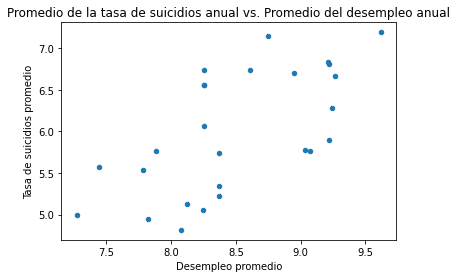

In [804]:
dataplot_df = pd.DataFrame({
    'Tasa de suicidios promedio': mediasanuales["Tasa_de_suicidios"],
    'Desempleo promedio': mediasanuales['porcentaje_de_desempleo_en_la_población']
})
dataplot_df.plot(x='Desempleo promedio', y='Tasa de suicidios promedio', kind='scatter', title='Promedio de la tasa de suicidios anual vs. Promedio del desempleo anual')

Esto hace que la correlación sea mucho más evidente.

Ahora veamos el caso de la expectativa de vida, lo trataremos de un modo similar: los outliers parecen ser los datos con una tasa de suicidios entre 5.25 y 6.5 y una expectativa de vida mayor a 76. En estos datos reemplazaremos el valor de la expectativa de vida por el promedio de la expectativa de vida.

<Axes: title={'center': 'Promedio de la tasa de suicidios anual vs. HDI anual'}, xlabel='expectativa de vida', ylabel='Tasa de suicidios promedio'>

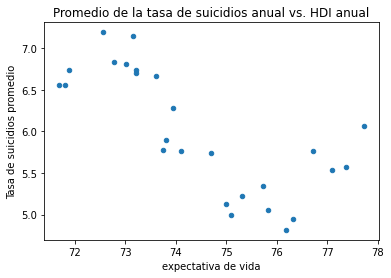

In [805]:
dataplot_df = pd.DataFrame({
    'Tasa de suicidios promedio': mediasanuales["Tasa_de_suicidios"],
    'expectativa de vida': mediasanuales['expectativa_de_vida']
})
dataplot_df.plot(x='expectativa de vida', y='Tasa de suicidios promedio', kind='scatter', title='Promedio de la tasa de suicidios anual vs. HDI anual')

In [806]:
mediasanuales.loc[(5.25<=mediasanuales['Tasa_de_suicidios']) &(mediasanuales['Tasa_de_suicidios'] <= 6.5) & (mediasanuales["expectativa_de_vida"]>76), "expectativa_de_vida"] = mediasanuales.mean()["expectativa_de_vida"]

<Axes: title={'center': 'Promedio de la tasa de suicidios anual vs. HDI anual'}, xlabel='expectativa de vida', ylabel='Tasa de suicidios promedio'>

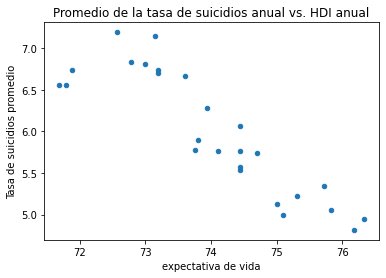

In [807]:
dataplot_df = pd.DataFrame({
    'Tasa de suicidios promedio': mediasanuales["Tasa_de_suicidios"],
    'expectativa de vida': mediasanuales['expectativa_de_vida']
})
dataplot_df.plot(x='expectativa de vida', y='Tasa de suicidios promedio', kind='scatter', title='Promedio de la tasa de suicidios anual vs. HDI anual')

Continuamos ahora con el HDI por año. En este caso, el único outlier que vemos tiene un HDI for year mayor a 0.84, lo reemplazaremos por el valor promedio del HDI for year.

<Axes: title={'center': 'Promedio de la tasa de suicidios anual vs. HDI anual'}, xlabel='HDI for year', ylabel='Tasa de suicidios promedio'>

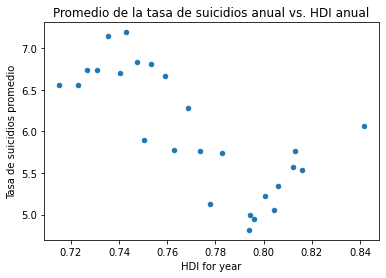

In [808]:
dataplot_df = pd.DataFrame({
    'Tasa de suicidios promedio': mediasanuales["Tasa_de_suicidios"],
    'HDI for year': mediasanuales['HDI_por_año']
})
dataplot_df.plot(x='HDI for year', y='Tasa de suicidios promedio', kind='scatter', title='Promedio de la tasa de suicidios anual vs. HDI anual')

In [809]:
mediasanuales.loc[(mediasanuales["HDI_por_año"] >= 0.84), "HDI_por_año"]=mediasanuales.mean()["HDI_por_año"]

<Axes: title={'center': 'Promedio de la tasa de suicidios anual vs. HDI anual'}, xlabel='HDI for year', ylabel='Tasa de suicidios promedio'>

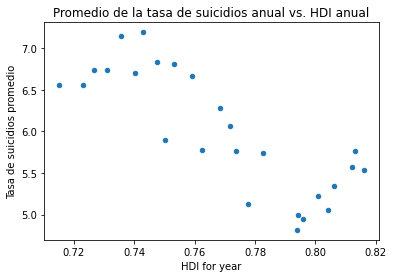

In [810]:
dataplot_df = pd.DataFrame({
    'Tasa de suicidios promedio': mediasanuales["Tasa_de_suicidios"],
    'HDI for year': mediasanuales['HDI_por_año']
})
dataplot_df.plot(x='HDI for year', y='Tasa de suicidios promedio', kind='scatter', title='Promedio de la tasa de suicidios anual vs. HDI anual')

Ahora vamos a trabajar de la misma manera con el porcentaje de internet en la población

<Axes: title={'center': 'Promedio de la tasa de suicidios anual vs. intenet'}, xlabel='% de internet en la poblacion', ylabel='Tasa de suicidios promedio'>

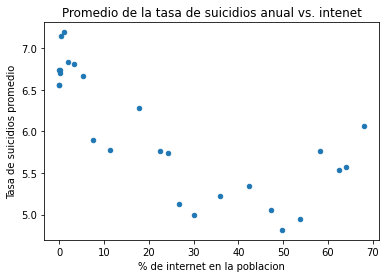

In [811]:
dataplot_df = pd.DataFrame({
    'Tasa de suicidios promedio': mediasanuales["Tasa_de_suicidios"],
    '% de internet en la poblacion': mediasanuales["porcentaje_de_internet_en_la_población"]
})
dataplot_df.plot(x='% de internet en la poblacion', y='Tasa de suicidios promedio', kind='scatter', title='Promedio de la tasa de suicidios anual vs. intenet')

In [812]:
mediasanuales.loc[(mediasanuales["porcentaje_de_internet_en_la_población"] >= 56) & (mediasanuales['Tasa_de_suicidios'] <= 6.5),"porcentaje_de_internet_en_la_población"] = mediasanuales.mean()["porcentaje_de_internet_en_la_población"]

<Axes: title={'center': 'Promedio de la tasa de suicidios anual vs. intenet'}, xlabel='% de internet en la poblacion', ylabel='Tasa de suicidios promedio'>

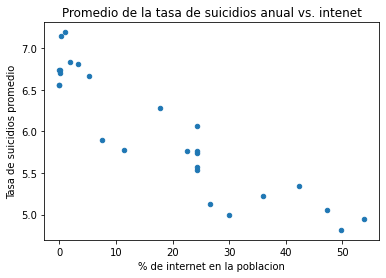

In [813]:
dataplot_df = pd.DataFrame({
    'Tasa de suicidios promedio': mediasanuales["Tasa_de_suicidios"],
    '% de internet en la poblacion': mediasanuales["porcentaje_de_internet_en_la_población"]
})
dataplot_df.plot(x='% de internet en la poblacion', y='Tasa de suicidios promedio', kind='scatter', title='Promedio de la tasa de suicidios anual vs. intenet')

Por ultimo hagamoslo con el gdp_per_capita

<Axes: title={'center': 'Promedio de la tasa de suicidios anual vs. gdp_per_capita ($)'}, xlabel='gdp_per_capita ($)', ylabel='Tasa de suicidios promedio'>

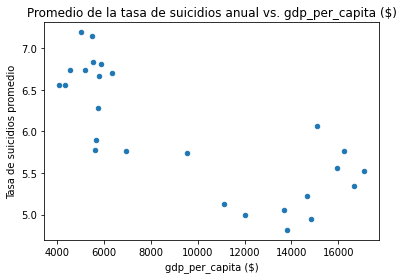

In [814]:
dataplot_df = pd.DataFrame({
    'Tasa de suicidios promedio': mediasanuales["Tasa_de_suicidios"],
    'gdp_per_capita ($)': mediasanuales["GDP_per_capita"]
})
dataplot_df.plot(x='gdp_per_capita ($)', y='Tasa de suicidios promedio', kind='scatter', title='Promedio de la tasa de suicidios anual vs. gdp_per_capita ($)')

In [815]:
mediasanuales.loc[(mediasanuales["GDP_per_capita"] >= 15000) & (mediasanuales['Tasa_de_suicidios'] >= 5.30) & (mediasanuales['Tasa_de_suicidios'] <= 6.5),"GDP_per_capita"] = mediasanuales.mean()["GDP_per_capita"]

<Axes: title={'center': 'Promedio de la tasa de suicidios anual vs. gdp_per_capita ($)'}, xlabel='gdp_per_capita ($)', ylabel='Tasa de suicidios promedio'>

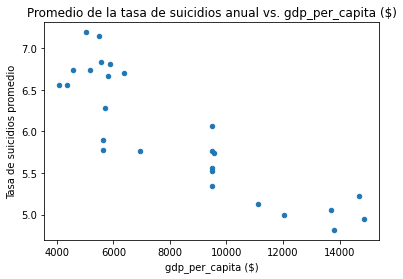

In [816]:
dataplot_df = pd.DataFrame({
    'Tasa de suicidios promedio': mediasanuales["Tasa_de_suicidios"],
    'gdp_per_capita ($)': mediasanuales["GDP_per_capita"]
})
dataplot_df.plot(x='gdp_per_capita ($)', y='Tasa de suicidios promedio', kind='scatter', title='Promedio de la tasa de suicidios anual vs. gdp_per_capita ($)')

Así, nuestros DataFrames principales quedan, despues de la limpieza de datos, de la siguiente manera: 

In [817]:
dataaños = mediasanuales

In [818]:
dataedadaño = data.groupby(["Año","Edad"])

In [819]:
datasexoaño = data.groupby(["Año","Sexo"])

In [820]:
dataañopais = data.groupby(["Año","País"])

## 4 Análisis de datos

Tenemos entonces tres datasets:

* dataaños: Data agrupada por años.
* dataedadaño: Data agrupada por edad y por años.
* datasexoaño: Data agrupada por año y por sexo.
* dataañopais: Data agrupada por año y por país.

Podemos preguntarnos, por ejemplo, cómo ha sido la evolución de la tasa de suicidios por cada 100k habitantes y si esta ha tenido cambios significativos en su media. Para hacer esto, utilizaremos un test de hipótesis de diferencia de medias. En este caso, tomaremos dos grupos de datos: los años desde 1990 hasta 2003 y de 2003 hasta 2015. Es decir, dividimos el conjunto de datos en dos partes medianamente iguales. Nuestra hipótesis nula será que no hay diferencia de medias entre los grupos, mientras que la hipótesis alternativa será que sí la hay. Finalmente, usaremos un alpha de 0.05.

### Inferencía y busqueda de relaciones

Podemos preguntarnos, por ejemplo, cómo ha sido la evolución de la tasa de suicidios por cada 100k habitantes y si esta ha tenido cambios significativos en su media. Para hacer esto, utilizaremos un test de hipótesis de diferencia de medias. En este caso, tomaremos dos grupos de datos: los años desde 1990 hasta 2003 y de 2003 hasta 2015. Es decir, dividimos el conjunto de datos en dos partes medianamente iguales. Nuestra hipótesis nula será que no hay diferencia de medias entre los grupos, mientras que la hipótesis alternativa será que sí la hay. Finalmente, usaremos un alpha de 0.05.

In [821]:
primeramitad = dataaños.reset_index()[dataaños.reset_index()["Año"]<2003]
segundamitad = dataaños.reset_index()[dataaños.reset_index()["Año"]>=2003]

In [822]:
test, pvalor = stats.ttest_ind(primeramitad['Tasa_de_suicidios'], segundamitad['Tasa_de_suicidios'] )
print(test, pvalor)

7.817880071430566 4.732518413280693e-08


Vemos que el p-valor es menor que nuestro nivel de significancia, luego su mitad tambien, es decir SÍ hay diferencia significativa en la tasa de suicidios

Veamos la siguiente grafica pra confirmar que tipo de diferencia, pues puede que las tasas hayan aumentado o disminuido

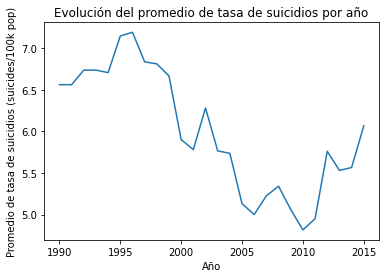

In [823]:
dataaños = dataaños.reset_index()
plt.plot(dataaños["Año"], dataaños['Tasa_de_suicidios'])
plt.xlabel('Año')
plt.ylabel('Promedio de tasa de suicidios (suicides/100k pop)')
plt.title('Evolución del promedio de tasa de suicidios por año')
plt.show()

Para complementar las medias veamos la grafica tambien con los promedios:

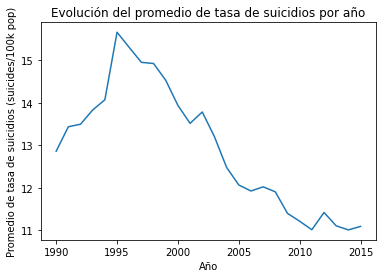

In [824]:
dataañosprom = data.groupby("Año").mean()
dataañosprom = dataañosprom.reset_index()
plt.plot(dataañosprom["Año"], dataañosprom['Tasa_de_suicidios'])
plt.xlabel('Año')
plt.ylabel('Promedio de tasa de suicidios (suicides/100k pop)')
plt.title('Evolución del promedio de tasa de suicidios por año')
plt.show()

Podemos ver que tanto las medias como las medianas indican una baja en la tasa de suicidios.

También nos gustaría saber si hay una diferencia significativa entre las tasas de suicidio de hombres y mujeres, y, si al interior de estos grupos, hay una diferencia significativa a lo largo del tiempo

In [825]:
hombres = datasexoaño.mean().reset_index()[datasexoaño.mean().reset_index()["Sexo"]=="hombre"]
mujeres = datasexoaño.mean().reset_index()[datasexoaño.mean().reset_index()["Sexo"]=="mujer"]

In [826]:
test, pvalor = stats.ttest_ind(hombres['Tasa_de_suicidios'], mujeres['Tasa_de_suicidios'] )
print(test, pvalor)

32.223504392854885 4.121811576177387e-35


SÍ hay una diferencia significativa entre las tasas de suicidios de hombres y mujeres

In [827]:
hombresprimmit = hombres[hombres['Año']<2003]
hombressegmmit = hombres[hombres['Año']>=2003]
mujeresprimmit = mujeres[mujeres['Año']<2003]
mujeressegmmit = mujeres[mujeres['Año']>=2003]

In [828]:
test, pvalor = stats.ttest_ind(hombresprimmit['Tasa_de_suicidios'], hombressegmmit['Tasa_de_suicidios'] )
print(test, pvalor)

7.229888524575129 1.803773487821974e-07


In [829]:
test, pvalor = stats.ttest_ind(mujeresprimmit['Tasa_de_suicidios'], mujeressegmmit['Tasa_de_suicidios'] )
print(test, pvalor)

11.079413033627139 6.402578117656463e-11


SÍ hay una diferencia significativa en la media de la tasa de suicidios en cada uno de los grupos a lo largo del tiempo. Veamos esto ilustrado en la siguiente grafica:

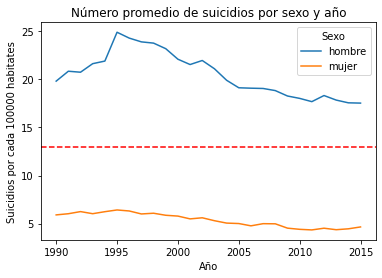

In [830]:
datasexoañoprom = datasexoaño.mean()
k =dataañosprom["Tasa_de_suicidios"].mean()
tabla = datasexoañoprom.pivot_table(values='Tasa_de_suicidios', index='Año', columns='Sexo')
tabla.plot(kind='line')

plt.axhline(y=k, color='red', linestyle='--')

plt.ylabel('Suicidios por cada 100000 habitates')
plt.xlabel('Año')
plt.title('Número promedio de suicidios por sexo y año')
plt.show()

También sería interesante saber como ha evolucionado la tasa de suicidios con respecto a los rangos de edad:

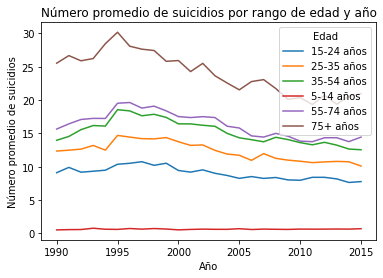

In [831]:
tabla = dataedadaño.mean().pivot_table(values='Tasa_de_suicidios', index='Año', columns='Edad')
tabla.plot(kind='line')
plt.ylabel('Número promedio de suicidios')
plt.xlabel('Año')
plt.title('Número promedio de suicidios por rango de edad y año')
plt.show()

Nos gustaría saber cómo ha evolucionado la tasa de suicidios tanto para hombres como para mujeres en sus rangos de edad. Para esto, creamos el dataframe datasexoedadaño donde agrupamos los datos por año, sexo y rango de edad. Así, por ejemplo, podemos seleccionar solo los datos de las mujeres en cada año y construir la gráfica deseada como sigue:

In [832]:
dataañosexoedad = data.groupby(['Año', 'Sexo', 'Edad']).mean().reset_index()

In [833]:
datamujeres = dataañosexoedad[dataañosexoedad['Sexo']== "mujer"]
datahombres = dataañosexoedad[dataañosexoedad['Sexo']== "hombre"]

In [834]:
datamujeres

,Año,Sexo,Edad,Número_de_suicidios,Población,Tasa_de_suicidios,HDI_por_año,GDP_per_capita,porcentaje_de_internet_en_la_población,porcentaje_de_desempleo_en_la_población,expectativa_de_vida
6,1990,mujer,15-24 años,82.937500,2.015246e+06,4.676094,0.715294,9806.328125,0.071945,7.448807,71.785000
7,1990,mujer,25-35 años,105.812500,1.993912e+06,5.106094,0.715294,9806.328125,0.071945,7.448807,71.785000
8,1990,mujer,35-54 años,228.468750,3.016110e+06,6.231094,0.715294,9806.328125,0.071945,7.448807,71.785000
9,1990,mujer,5-14 años,6.000000,2.028641e+06,0.324219,0.715294,9806.328125,0.071945,7.448807,71.785000
10,1990,mujer,55-74 años,232.671875,2.036211e+06,7.758125,0.715294,9806.328125,0.071945,7.448807,71.785000
...,...,...,...,...,...,...,...,...,...,...,...
307,2015,mujer,25-35 años,101.048387,2.225557e+06,3.930484,0.840018,26231.193548,67.358018,8.151036,77.724138
308,2015,mujer,35-54 años,256.064516,4.201085e+06,5.176452,0.840018,26231.193548,67.358018,8.151036,77.724138
309,2015,mujer,5-14 años,11.177419,1.942780e+06,0.685806,0.840018,26231.193548,67.358018,8.151036,77.724138
310,2015,mujer,55-74 años,207.758065,3.044661e+06,6.577419,0.840018,26231.193548,67.358018,8.151036,77.724138


In [835]:
tabla = datamujeres.pivot_table(values='Tasa_de_suicidios', index='Año', columns='Edad')
tabla2 = datahombres.pivot_table(values='Tasa_de_suicidios', index='Año', columns='Edad')

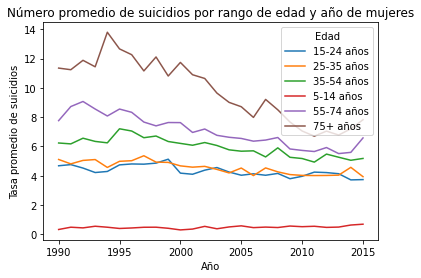

In [836]:
tabla.plot(kind='line')
plt.ylabel('Tasa promedio de suicidios')
plt.xlabel('Año')
plt.title('Número promedio de suicidios por rango de edad y año de mujeres')
plt.show()

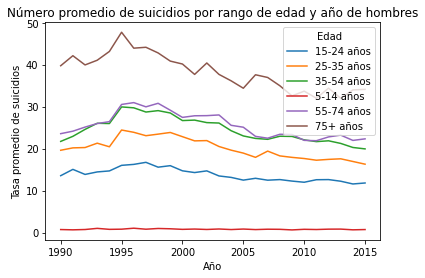

In [838]:
tabla2.plot(kind='line')
plt.ylabel('Tasa promedio de suicidios')
plt.xlabel('Año')
plt.title('Número promedio de suicidios por rango de edad y año de hombres')
plt.show()

Ahora veamos cómo ha cambiado la tasa de suicidios por país. Para esto, haremos un modelo de correlación lineal de la tasa de suicidios por año de cada país según el año. Tomaremos el coeficiente de correlación y, si la correlación es significativa, asociaremos cada uno de estos coeficientes con el país correspondiente.

In [839]:
datacorpaises = dataañopais.mean().reset_index()
paiscorr = pd.Series()
for pais in datacorpaises['País'].unique():
  años = datacorpaises[datacorpaises['País'] == pais]["Año"]
  tasa = datacorpaises[datacorpaises['País'] == pais]["Tasa_de_suicidios"]
  if len(años) >= 2 & len(tasa) >= 2:
    coef, p = stats.pearsonr(años, tasa)
    if p < 0.05:
      paiscorr.at[pais] = coef

paiscorr = paiscorr.sort_values();

<ipython-input-839-977d5829e2f1>:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



Una vez tenemos nuestra serie asociando los países con su coeficiente de correlación, podemos ver cual es el porcentaje de países en los cuales este coeficiente es negativo, es decir, cual es el porcentaje de países en los cuales la tasa de suicidios ha disminuido

In [840]:
negativos = paiscorr.apply(lambda x: x < 0).sum()
mejoria = (negativos/len(paiscorr))

Una vez que tenemos la proporción de mejora, encontremos su intervalo de confianza con un nivel de confianza del 95%. El primer paso es verificar si los datos siguen una distribución normal, para lo cual usaremos el test de Shapiro-Wilk.

In [841]:
stats.shapiro(paiscorr.values)

ShapiroResult(statistic=0.7565498352050781, pvalue=2.9893223540966574e-07)

Como el p-valor es menor a 0.05, los datos están normalmente distribuidos. Podemos proceder entonces con la construcción del intervalo de confianza:

In [842]:
z = 1.960
significancia = 0.05
multiplicador_z = stats.norm.ppf(1 - significancia/2)
n = 45
error_std = np.sqrt((mejoria * (1-mejoria)) / n)
limite_inferior = mejoria - multiplicador_z * error_std
limite_superior = mejoria + multiplicador_z * error_std
intervalo = (limite_inferior, limite_superior)
print(intervalo)

(0.5289344372656529, 0.8043988960676803)


Podemos ver entonces que de la mitad de los paises hasta el ochenta porciento han disminuido su tasa de suicidios

###Modelamiento 

In [843]:
dataaños.corr()

,Año,Número_de_suicidios,Población,Tasa_de_suicidios,HDI_por_año,GDP_per_capita,porcentaje_de_internet_en_la_población,porcentaje_de_desempleo_en_la_población,expectativa_de_vida
Año,1.000000,-0.406258,-0.036433,-0.773149,0.931996,0.782304,0.822556,-0.543107,0.836878
Número_de_suicidios,-0.406258,1.000000,0.784111,0.789230,-0.561058,-0.662136,-0.674312,0.301669,-0.696617
Población,-0.036433,0.784111,1.000000,0.348229,-0.210518,-0.237227,-0.255155,-0.160582,-0.364054
Tasa_de_suicidios,-0.773149,0.789230,0.348229,1.000000,-0.817250,-0.875885,-0.915118,0.640629,-0.886174
HDI_por_año,0.931996,-0.561058,-0.210518,-0.817250,1.000000,0.809773,0.845498,-0.542518,0.863450
GDP_per_capita,0.782304,-0.662136,-0.237227,-0.875885,0.809773,1.000000,0.928140,-0.611952,0.912304
porcentaje_de_internet_en_la_población,0.822556,-0.674312,-0.255155,-0.915118,0.845498,0.928140,1.000000,-0.550278,0.948502
porcentaje_de_desempleo_en_la_población,-0.543107,0.301669,-0.160582,0.640629,-0.542518,-0.611952,-0.550278,1.000000,-0.451630
expectativa_de_vida,0.836878,-0.696617,-0.364054,-0.886174,0.863450,0.912304,0.948502,-0.451630,1.000000


Vemos que está claro que la variable de interés, el número de suicidios por cada 100k habitantes, está intensamente relacionada con las variables: gdp_per_capita, % de internet en la población, % de desempleo en la población, la expectativa de vida y el HDI por year.

Realicemos cada uno de los modelos para cada una de las variables para finalmente hacer un modelo multilínea.

####Gdp_per_capita

Comencemos viendo la correlación entre estas dos variables, con un alpha de 0.05

In [844]:
coef, p = stats.pearsonr(dataaños['Tasa_de_suicidios'], dataaños['GDP_per_capita'])
coef, p

(-0.8758854444947385, 4.616072715609349e-09)

El coeficiente de correlación es negativa, y vemos que el p-valor es menor que alpha, luego la correlación SÍ es significativa, ahora continuemos con el modelo:

In [845]:
model = smf.ols("Tasa_de_suicidios ~ GDP_per_capita", data=dataaños).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Tasa_de_suicidios   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     79.08
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           4.62e-09
Time:                        00:04:55   Log-Likelihood:                -9.5630
No. Observations:                  26   AIC:                             23.13
Df Residuals:                      24   BIC:                             25.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.5396      0.188     40.126      0.000       7.152       7.927
GDP_per_capita    -0.0002   2.12e-05     -8.893      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        0.761   Durbin-Watson:                   1.135
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.703
Skew:                          -0.030   Prob(JB):                        0.704
Kurtosis:                       2.197   Cond. No.                     2.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Para este caso tenemos un coeficiente de determinación de 0.767, un intercepto de 7.5396 y una pendiente de -0.0002

#### % de internet de la poblacion

Procedamos de la misma manera:

In [846]:
coef, p = stats.pearsonr(dataaños['Tasa_de_suicidios'], dataaños['porcentaje_de_internet_en_la_población'])
coef, p

(-0.9151184310192612, 5.953251507073281e-11)

Luego la correlación SÍ es significativa

In [847]:
model = smf.ols("Tasa_de_suicidios ~ porcentaje_de_internet_en_la_población", data=dataaños).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Tasa_de_suicidios   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     123.6
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           5.95e-11
Time:                        00:05:01   Log-Likelihood:                -4.8927
No. Observations:                  26   AIC:                             13.79
Df Residuals:                      24   BIC:                             16.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  6.7116      0.088     76.380      0.000       6.530       6.893
porcentaje_de_internet_en_la_población    -0.0390      0.004    -11.119      0.000      -0.046      -0.032
==============================================================================
Omnibus:                        0.978   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                0.972
Skew:                          -0.371   Prob(JB):                        0.615
Kurtosis:                       2.412   Cond. No.                         37.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En este caso

*  Coeficiente de determinación : 0.837
*  Intercepto: 6.7116
*  Pendiente: -0.0390

####  % de desempleo en la poblacion

De la misma forma:

In [848]:
coef, p = stats.pearsonr(dataaños['Tasa_de_suicidios'], dataaños['porcentaje_de_desempleo_en_la_población'])
coef, p

(0.6406294543917543, 0.0004225062591470519)

Entonces la correación SÍ es significativa

In [849]:
model = smf.ols("Tasa_de_suicidios ~ porcentaje_de_desempleo_en_la_población", data=dataaños).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Tasa_de_suicidios   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     16.71
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           0.000423
Time:                        00:05:06   Log-Likelihood:                -21.642
No. Observations:                  26   AIC:                             47.28
Df Residuals:                      24   BIC:                             49.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -0.5383      1.602     -0.336      0.740      -3.845       2.768
porcentaje_de_desempleo_en_la_población     0.7686      0.188      4.087      0.000       0.380       1.157
==============================================================================
Omnibus:                        5.260   Durbin-Watson:                   0.464
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                1.729
Skew:                           0.080   Prob(JB):                        0.421
Kurtosis:                       1.747   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En este caso

*  Coeficiente de determinación : 0.442
*  Intercepto: -0.8652
*  Pendiente: 0.8052

#### Espectativa de vida

In [850]:
coef, p = stats.pearsonr(dataaños['Tasa_de_suicidios'], dataaños['expectativa_de_vida'])
coef, p

(-0.8861739966818686, 1.726673671525601e-09)

La correlación SÍ es significativa

In [851]:
model = smf.ols("Tasa_de_suicidios ~ expectativa_de_vida", data=dataaños).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Tasa_de_suicidios   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     87.79
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           1.73e-09
Time:                        00:05:10   Log-Likelihood:                -8.5091
No. Observations:                  26   AIC:                             21.02
Df Residuals:                      24   BIC:                             23.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              42.8591      3.935     10.891      0.000      34.737      50.981
expectativa_de_vida    -0.4981      0.053     -9.369      0.000      -0.608      -0.388
==============================================================================
Omnibus:                        0.966   Durbin-Watson:                   0.941
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.805
Skew:                           0.109   Prob(JB):                        0.669
Kurtosis:                       2.166   Cond. No.                     4.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*  Coeficiente de determinación : 0.785
*  Intercepto: 42.851
*  Pendiente: -0.4981

####HDI por año


In [852]:
coef, p = stats.pearsonr(dataaños['Tasa_de_suicidios'], dataaños['HDI_por_año'])
coef, p

(-0.817250293218029, 3.485339220624393e-07)

Luego la correlación SÍ es significativa

In [853]:
model = smf.ols("Tasa_de_suicidios ~ HDI_por_año", data=dataaños).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Tasa_de_suicidios   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     48.27
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           3.49e-07
Time:                        00:05:15   Log-Likelihood:                -14.180
No. Observations:                  26   AIC:                             32.36
Df Residuals:                      24   BIC:                             34.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      20.9948      2.161      9.716      0.000      16.535      25.455
HDI_por_año   -19.5024      2.807     -6.947      0.000     -25.296     -13.709
==============================================================================
Omnibus:                        4.884   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                1.659
Skew:                          -0.045   Prob(JB):                        0.436
Kurtosis:                       1.766   Cond. No.                         52.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*  Coeficiente de determinación : 0.668
*  Intercepto: 20.9948
*  Pendiente: -19.5024

#### Modelo multi lineal

In [854]:
model = sm.OLS.from_formula("Tasa_de_suicidios ~ HDI_por_año + expectativa_de_vida + porcentaje_de_desempleo_en_la_población + porcentaje_de_internet_en_la_población + GDP_per_capita", data=dataaños)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Tasa_de_suicidios   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     28.26
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.04e-08
Time:                        00:05:17   Log-Likelihood:                -1.3725
No. Observations:                  26   AIC:                             14.74
Df Residuals:                      20   BIC:                             22.29
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  19.2361     11.189      1.719      0.101      -4.105      42.577
HDI_por_año                                -0.3482      3.986     -0.087      0.931      -8.664       7.967
expectativa_de_vida                        -0.2052      0.175     -1.171      0.256      -0.571       0.160
porcentaje_de_desempleo_en_la_población     0.2907      0.137      2.122      0.047       0.005       0.577
porcentaje_de_internet_en_la_población     -0.0209      0.012     -1.678      0.109      -0.047       0.005
GDP_per_capita                           1.556e-05   5.26e-05      0.296      0.770   -9.42e-05       0.000
==============================================================================
Omnibus:                        1.138   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                0.616
Skew:                          -0.377   Prob(JB):                        0.735
Kurtosis:                       2.998   Cond. No.                     1.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vemos que tenemos un coeficiente de determinación alto, indicando que nuestro modelo puede predecir bien las tasas de suicidio con los datos dependientes.


###Concluciones


Luego de analizar los datos y de poder llegar a un buen modelo del sistema, podemos llegar a las siguientes conclusiones:

* A pesar de que el promedio de suicidios ha aumentado a lo largo de los años, el promedio de tasa de suicidios ha disminuido dramáticamente, mostrando una mejoría en el manejo de la salud mental a lo largo del tiempo.

* Dos tercios de los países en los cuales el ritmo de la tasa de suicidios decae linealmente presentan un coeficiente de correlación negativo, lo cual indica que no solo globalmente la tasa está disminuyendo, sino que en la mayoría de los países también.

* La tasa de suicidios de los hombres a nivel global es siempre más alta con respecto a la de las mujeres, aunque en los últimos años ha descendido tendiendo al promedio, indicando así que los esfuerzos en las campañas contra el suicidio deben tener un enfoque considerando el sexo masculino.

* La probabilidad de suicidio aumenta por edad, indicando que las campañas deben estar enfocadas en los más viejos.

* La tasa de suicidios de un país depende fuertemente y de manera significativa de otras cinco variables: GDP per capita, entre mayor es el GDP per capita, menor será la tasa de suicidios. Porcentaje de acceso a Internet de la población, entre más porcentaje de acceso menos tasa de suicidios. Porcentaje de desempleo de la población, entre más porcentaje de desempleo, más tasa de suicidios. Expectativa de vida, entre más expectativa de vida, menos tasa de suicidios. HDI por año, entre más HDI por año, menos tasa de suicidios. En general, si el país ofrece una buena calidad de vida a la población, el riesgo de suicidios disminuirá, estableciendo así un norte para posibles políticas públicas.

## 5 visualizacion de los datos 

Para la visualización de los datos utilizaremos las librebrias matplotlib y plotly, seaborn

In [ ]:
!pip install -U plotly
!pip install -U kaleido
!pip install folium
import plotly
import plotly.graph_objs as go 
import plotly.express as px
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

Comenzaremos graficando las tendencias de la tasa de suicidios a nivel globlal, por genero y por rango de edad con la libreria plotly

In [856]:
fig = px.line(dataañosprom, x='Año', y='Tasa_de_suicidios', title='Tendencia de la media de suicidios a nivel mundial')
fig.add_trace(go.Scatter(x = dataañosprom['Año'],  # Datos del eje X.
                         y = dataañosprom['Tasa_de_suicidios'],  # Datos del eje Y.
                         name = 'año y tasa de suicidios', # Nombre del objeto Scatter.
                         mode='markers'                           
                         ))
fig.update_xaxes(title='Año')
fig.update_yaxes(title='Suicidios por cada 100k habitantes')
fig.update_layout(
    title={
        'text': "Tendencia de la media de suicidios a nivel mundial",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#f7f7f7'
)


Tambien veamos como graficar las tendencias por genero incluyendo la media

In [857]:
fig = px.line(datasexoañoprom.reset_index(), x='Año', y='Tasa_de_suicidios', color='Sexo', title='Tendencias de suicidios por género')
fig.add_shape(type="line", x0=1990, x1=2015, y0=np.mean(dataañosprom["Tasa_de_suicidios"]), y1=np.mean(dataañosprom["Tasa_de_suicidios"]), 
              line=dict(color="black", width=2, dash="dash"), name="Promedio global")
fig.update_layout(
    title={
        'text': "Tendencia de la media de suicidios a nivel mundial por genero",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#f7f7f7'
)

Veamos ahora la evolución por edad a lo largo del tiempo:

In [858]:
fig = px.line(dataedadaño.mean().reset_index(), x='Año', y='Tasa_de_suicidios', color='Edad', title='Tendencias de suicidios por edad')
fig.update_layout(
    title={
        'text': "Tendencia de la media de suicidios a nivel mundial por edad",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#f7f7f7'
)

Ahora, hagamos un digrama de barras que represente la tasa de suicidios por sexo cada año:

In [859]:
datasexoaño.mean()

Número_de_suicidios     Población  Tasa_de_suicidios  \
Año  Sexo                                                           
1990 hombre           373.028646  1.856140e+06          19.818906   
     mujer            130.515625  1.963184e+06           5.907005   
1991 hombre           386.453125  1.885886e+06          20.849792   
     mujer            129.223958  1.994292e+06           6.027969   
1992 hombre           410.015385  1.958993e+06          20.747462   
     mujer            132.223077  2.065467e+06           6.249667   
1993 hombre           436.497436  1.910316e+06          21.636154   
     mujer            131.617949  2.013829e+06           6.031256   
1994 hombre           442.477941  1.847854e+06          21.906520   
     mujer            126.303922  1.948100e+06           6.240025   
1995 hombre           403.931624  1.654725e+06          24.905256   
     mujer            116.461538  1.746043e+06           6.420085   
1996 hombre           415.891775  1.752216e+06          24.296472   
     mujer            118.145022  1.845766e+06           6.314372   
1997 hombre           403.937229  1.797678e+06          23.903983   
     mujer            117.155844  1.888451e+06           6.004740   
1998 hombre           409.198312  1.774337e+06          23.774198   
     mujer            117.364979  1.865286e+06           6.079641   
1999 hombre           401.413655  1.738817e+06          23.196305   
     mujer            112.881526  1.828177e+06           5.867771   
2000 hombre           388.717054  1.700929e+06          22.099651   
     mujer            107.081395  1.785947e+06           5.783004   
2001 hombre           374.342803  1.621196e+06          21.546345   
     mujer            100.376894  1.703739e+06           5.491932   
2002 hombre           388.655039  1.722532e+06          21.966996   
     mujer            107.653101  1.808771e+06           5.606105   
2003 hombre           388.472868  1.737366e+06          21.107655   
     mujer            107.804264  1.825537e+06           5.302384   
2004 hombre           372.279762  1.687127e+06          19.909762   
     mujer            105.619048  1.775664e+06           5.054127   
2005 hombre           361.785714  1.679124e+06          19.129286   
     mujer            103.244048  1.763157e+06           5.007599   
2006 hombre           355.533333  1.763041e+06          19.085863   
     mujer            102.037255  1.846585e+06           4.769059   
2007 hombre           349.000000  1.761139e+06          19.056667   
     mujer            103.341085  1.842668e+06           4.994012   
2008 hombre           355.831373  1.783950e+06          18.835961   
     mujer            105.829412  1.864326e+06           4.979412   
2009 hombre           353.121723  1.813200e+06          18.273333   
     mujer            102.846442  1.887602e+06           4.528240   
2010 hombre           349.393939  1.853983e+06          18.025682   
     mujer            102.693182  1.928777e+06           4.406117   
2011 hombre           352.457364  1.888954e+06          17.686376   
     mujer            105.844961  1.974151e+06           4.344322   
2012 hombre           364.504115  1.922671e+06          18.321811   
     mujer            109.076132  2.013156e+06           4.521626   
2013 hombre           357.791667  1.925691e+06          17.849708   
     mujer            107.206250  2.012146e+06           4.366208   
2014 hombre           366.299145  1.996748e+06          17.564124   
     mujer            110.162393  2.088844e+06           4.458803   
2015 hombre           420.408602  2.330323e+06          17.534677   
     mujer            127.010753  2.440263e+06           4.653468   

             HDI_por_año  GDP_per_capita  \
Año  Sexo                                  
1990 hombre     0.715294     9806.328125   
     mujer      0.715294     9806.328125   
1991 hombre     0.723160    10132.937500   
     mujer      0.723160    10132.937500   
1992 hombre     0.7268

In [860]:
px.bar(datasexoaño.mean().reset_index(), 
       x = 'Año', 
       y = 'Tasa_de_suicidios', 
       color = 'Sexo',
       barmode = 'group' # Generar diagramas de barras lado a lado, sin apilar las categorías de color.
)

A nos gustaria ver cada una de las correlaciones mencinadas en el apartado de correlacion:

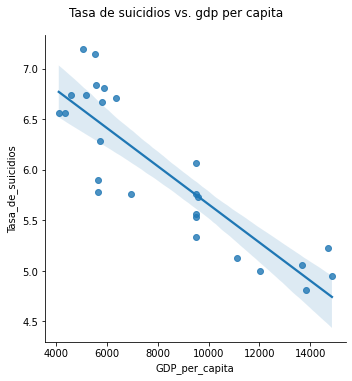

In [871]:
regre = sns.lmplot(x = 'GDP_per_capita', y = 'Tasa_de_suicidios', palette='viridis',data = dataaños);
regre.fig.suptitle("Tasa de suicidios vs. gdp per capita", y = 1.05)
regre.savefig("gdp.png")

Text(0.5, 1.05, 'Tasa de suicidios vs. porcentaje de internet en la población')

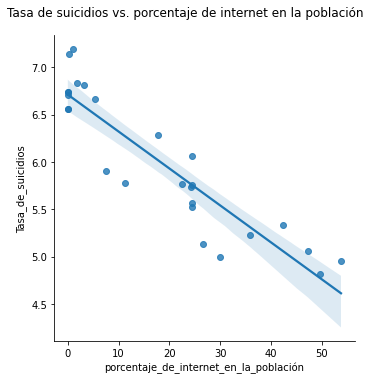

In [862]:
regre = sns.lmplot(x = 'porcentaje_de_internet_en_la_población', y = 'Tasa_de_suicidios', palette='deep',data = dataaños);
regre.fig.suptitle("Tasa de suicidios vs. porcentaje de internet en la población", y = 1.05)

Text(0.5, 1.05, 'Tasa de suicidios vs. porcentaje de desempleo en la población')

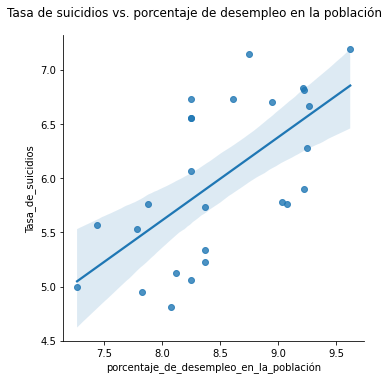

In [863]:
regre = sns.lmplot(x = 'porcentaje_de_desempleo_en_la_población', y = 'Tasa_de_suicidios', palette='colorblind',data = dataaños);
regre.fig.suptitle("Tasa de suicidios vs. porcentaje de desempleo en la población", y = 1.05)

Text(0.5, 1.05, 'Tasa de suicidios vs. expectativa de vida')

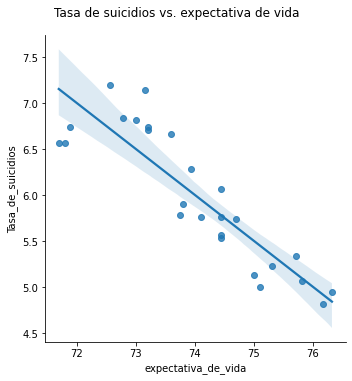

In [864]:
regre = sns.lmplot(x = 'expectativa_de_vida', y = 'Tasa_de_suicidios', palette='muted',data = dataaños);
regre.fig.suptitle("Tasa de suicidios vs. expectativa de vida", y = 1.05)

Text(0.5, 1.05, 'Tasa de suicidios vs. indice de desarrollo humano')

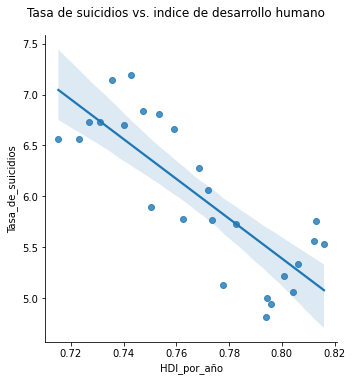

In [865]:
regre = sns.lmplot(x = 'HDI_por_año', y = 'Tasa_de_suicidios', palette='muted',data = dataaños);
regre.fig.suptitle("Tasa de suicidios vs. indice de desarrollo humano", y = 1.05)

Finalmente hagamos un mapa coroplético que muestre la tasa de suicidio promedio de cada país

In [866]:
datapais = data.groupby("País").mean()

In [867]:
geojson = gpd.read_file('countries.geojson')

In [868]:
datos_geo = geojson.merge(datapais, left_on='ADMIN', right_index=True)

In [869]:
fig = go.Figure(data=go.Choropleth(
    locations = datos_geo['ISO_A3'],
    z = datos_geo['Tasa_de_suicidios'],
    text = datos_geo['ADMIN'],
    colorscale = 'YlOrRd',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = 'Tasa de suicidios<br>(%)'
))

fig.update_layout(
    title={
        'text': 'Tasa de suicidios promedio por país',
        'x': 0.5
    },
    geo=dict(
        showcoastlines=True,
        showland=True,
        showcountries=True,
        countrycolor='white',
        landcolor='lightgray',
        coastlinecolor='darkgray',
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, t=50, b=0),
    height=500
)

fig.show()